# Plateforme de recommandation des produits Chanel
> Un travail réalisé par `Nom stylé (Nom du groupe)` composé de :<br>
> Johanu GANDONOU - Maxime MARECESCHE<br>
> Salomon KABONGO - Arno BIDET

Bienvenue sur ce Jupyter Notebook. Dans ce dernier, notre équipe va, étape par étape, réaliser un système de recommendation de produits de la marque Chanel.

## Partie 1 : Analyse approfondie du jeu de données

Dans cette partie, nous allons chercher à analyser les données afin de pouvoir ensuite les nettoyer et les traiter, afin d'avoir un jeu de donnée prêt pour nos entrainements.

### 1. Exploration initiale

#### Charger les données

Dans un premier temps, on charge le jeu de données

In [ ]:
!pip install datasets

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import pandas as pd
from datasets import Dataset

In [ ]:
dataset = load_dataset("DBQ/Chanel.Product.prices.Germany")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001-d681c47b79d440(…):   0%|          | 0.00/200k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1428 [00:00<?, ? examples/s]

On cherche à convertir le dataset en DataFrame afin de pouvoir le manipuler plus facilement.

In [ ]:
df = Dataset.from_dict(dataset).to_pandas()

NameError: name 'dataset' is not defined

Observons un peu le jeu de donnée.

In [ ]:
df.head()

NameError: name 'df' is not defined

On remarque que les lignes sont en json. Ce n'est pas ce que l'on souhaite !
Mais peut être que les données sont ainsi parce que les attributs sont hétérogènes. Vérifions cela.

In [ ]:
attribute_counts = {}

# Iterate through each dictionary in the 'train' column
for item in df['train']:
    # Iterate through the keys (attributes) of the current dictionary
    for attribute in item.keys():
        attribute_counts[attribute] = attribute_counts.get(attribute, 0) + 1

print("Nombre d'occurrences de chaque attribut:")
print(attribute_counts)

Nombre d'occurrences de chaque attribut:
{'brand': 1428, 'category1_code': 1428, 'category2_code': 1428, 'category3_code': 1428, 'competence_date': 1428, 'country_code': 1428, 'currency_code': 1428, 'flg_discount': 1428, 'full_price': 1428, 'full_price_eur': 1428, 'imageurl': 1428, 'itemurl': 1428, 'price': 1428, 'price_eur': 1428, 'product_code': 1428, 'title': 1428, 'website_name': 1428}


On voit que toutes les lignes ont le même nombre d'argument, et les mêmes. Transformons ces objets JSON en notre tableau de donnée.

In [ ]:
df = pd.json_normalize(df['train'])

In [ ]:
df.head()

brand category1_code      category2_code category3_code competence_date  \
0  CHANEL        FASHION            HANDBAGS           N.A.      2023-11-17   
1  CHANEL        FASHION            HANDBAGS           N.A.      2023-11-17   
2  CHANEL        EYEWEAR  BLUE LIGHT GLASSES           N.A.      2023-11-17   
3  CHANEL        EYEWEAR          SUNGLASSES           N.A.      2023-11-17   
4  CHANEL        EYEWEAR          SUNGLASSES           N.A.      2023-11-17   

  country_code currency_code  flg_discount  full_price  full_price_eur  \
0          DEU           EUR             0      5200.0          5200.0   
1          DEU           EUR             0      5750.0          5750.0   
2          DEU           EUR             0       420.0           420.0   
3          DEU           EUR             0       580.0           580.0   
4          DEU           EUR             0       480.0           480.0   

                                            imageurl  \
0  https://res.cloudinary.com/dwayrkp5z/image/fet...   
1  https://res.cloudinary.com/dwayrkp5z/image/fet...   
2  https://res.cloudinary.com/dwayrkp5z/image/fet...   
3  https://res.cloudinary.com/dwayrkp5z/image/fet...   
4  https://res.cloudinary.com/dwayrkp5z/image/fet...   

                                             itemurl   price  price_eur  \
0  https://www.chanel.com/de/mode/p/AS4152B13455N...  5200.0     5200.0   
1  https://www.chanel.com/de/mode/p/A67085Y099539...  5750.0     5750.0   
2  https://www.chanel.com/de/brillen/p/A71441X081...   420.0      420.0   
3  https://www.chanel.com/de/brillen/p/A71449X099...   580.0      580.0   
4  https://www.chanel.com/de/brillen/p/A71466X010...   480.0      480.0   

    product_code                                              title  \
0  PAS4152B13455  Tweed & goldfarbenes Metall  Schwarz  Rosa & B...   
1  PA67085Y09953                                               n.a.   
2        PA71441                                            Schwarz   
3        PA71449           Silberfarben. Gläser: Braun  Mit Verlauf   
4        PA71466             Blau & Rosa. Gläser: Grau  Mit Verlauf   

  website_name  
0       Chanel  
1       Chanel  
2       Chanel  
3       Chanel  
4       Chanel

#### Analyse globale des attributs

Maintenant, voyons voir les infos de chaque colonne.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            1428 non-null   object 
 1   category1_code   1428 non-null   object 
 2   category2_code   1428 non-null   object 
 3   category3_code   1428 non-null   object 
 4   competence_date  1428 non-null   object 
 5   country_code     1428 non-null   object 
 6   currency_code    1428 non-null   object 
 7   flg_discount     1428 non-null   int64  
 8   full_price       1428 non-null   float64
 9   full_price_eur   1428 non-null   float64
 10  imageurl         1428 non-null   object 
 11  itemurl          1428 non-null   object 
 12  price            1428 non-null   float64
 13  price_eur        1428 non-null   float64
 14  product_code     1428 non-null   object 
 15  title            1428 non-null   object 
 16  website_name     1428 non-null   object 
dtypes: float64(4),

Super ! Normallement aucune colonne n'est `null`, mais vérifions.

In [ ]:
df.isna().sum()

brand              0
category1_code     0
category2_code     0
category3_code     0
competence_date    0
country_code       0
currency_code      0
flg_discount       0
full_price         0
full_price_eur     0
imageurl           0
itemurl            0
price              0
price_eur          0
product_code       0
title              0
website_name       0
dtype: int64

#### Analyse spécifique

Bien, maintenant, remarquons que certains attributs ont des qualités plus intéressantes pour effectuer des analyses. Notamment celles qui relèvent de la **catégorisation** comme `category1_code`, `category2_code`et `category3_code`, du **label** via `title`, de la représentation visuel via `image_url`, et enfin de manière **quantitative** via le prix `price`. Nous allons faire une analyse exhaustive de tous les attributs afin de déterminer lesquels sont pertinent pour la suite de notre travail.




##### Title

Dans des champs textuel, il pourrait être inscrit des valeurs tel que `n.a.`. Pour nous en assurer, cherchons une liste de pattern dans les valeurs des colonnes.

In [ ]:
patterns_to_check = ['n.a.', 'N.A.', 'na', 'NA', 'nan', 'N/A', '', 'None']

for col in df.select_dtypes(include=['object']).columns:
    unique_values = df[col].unique()
    found_patterns = [val for val in unique_values if isinstance(val, str) and val.strip() in patterns_to_check]

    if found_patterns:
        print(f"Column '{col}' contains patterns: {found_patterns}")
    else:
        print(f"Column '{col}' does not contain specified patterns.")

Column 'brand' does not contain specified patterns.
Column 'category1_code' does not contain specified patterns.
Column 'category2_code' does not contain specified patterns.
Column 'category3_code' contains patterns: ['N.A.']
Column 'competence_date' does not contain specified patterns.
Column 'country_code' does not contain specified patterns.
Column 'currency_code' does not contain specified patterns.
Column 'imageurl' does not contain specified patterns.
Column 'itemurl' does not contain specified patterns.
Column 'product_code' does not contain specified patterns.
Column 'title' contains patterns: ['n.a.']
Column 'website_name' does not contain specified patterns.


##### Catégories

Commencons par étudier les catégories.

In [ ]:
category1_counts = df['category1_code'].value_counts()
category2_counts = df['category2_code'].value_counts()
category3_counts = df['category3_code'].value_counts()

In [ ]:
category1_counts

category1_code
FASHION      550
FRAGRANCE    199
JEWELRY      193
EYEWEAR      163
MAKEUP       121
SKINCARE     104
WATCHES       98
Name: count, dtype: int64

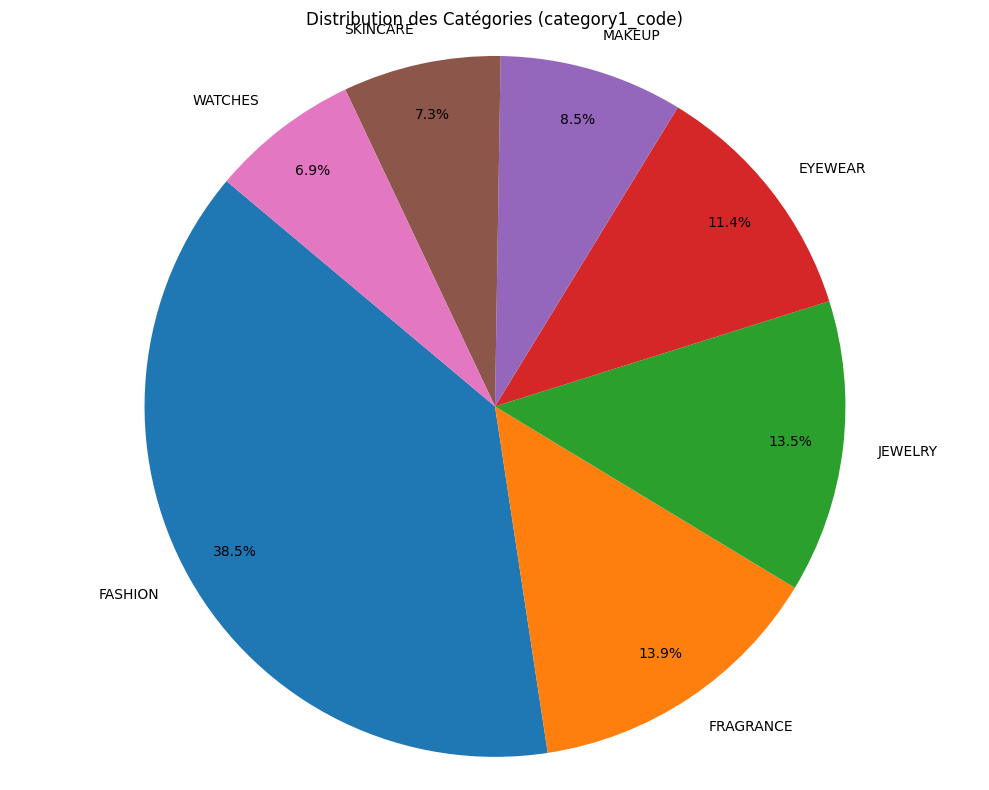

In [ ]:
category1_counts = df['category1_code'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(category1_counts, labels=category1_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Distribution des Catégories (category1_code)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

Pour `category1_code`, la `FASHION`est sur-représenté, occupant plus du tiers des produits. Les autres sont plus équilibrés, allant de 7 à 14% des produits.

In [ ]:
category2_counts

category2_code
READY-TO-WEAR                  243
COSTUME JEWELRY                127
SUNGLASSES                      99
WOMEN                           88
WATCHES                         87
MEN                             72
HANDBAGS                        61
COCO CRUSH                      54
SHOES                           42
FACE                            41
EYEGLASSES                      40
SMALL LEATHER GOODS             38
BATH AND BODY                   36
EYES                            35
MOISTURIZERS                    35
RINGS                           35
NECKLACES                       30
BRUSHES AND ACCESSORIES         26
EARRINGS                        26
BLUE LIGHT GLASSES              24
LIPS                            21
N°5                             15
EXCEPTIONAL PIECES              11
CLEANSERS & MAKEUP REMOVERS     11
TONERS & LOTIONS                11
BELTS                           10
BRACELETS                        9
OILS                             9
HEADWEAR                         9
SCARVES                          8
CAMELLIAS                        8
SERUMS                           8
MASKS & EXFOLIATORS              7
EYE & LIP CARE                   6
NAILS                            5
COMETE                           5
MISTS                            5
OTHER ACCESSORIES                4
LES INTEMPORELS DE CHANEL        4
BROOCHES                         3
LES EXCLUSIFS DE CHANEL          3
N°5 COLLECTION                   3
1932 COLLECTION (2022)           3
1.5 1 CAMELIA. 5 ALLURES         3
SOUS LE SIGNE DU LION HJ         2
SUN PROTECTION                   1
L'ESPRIT DU LION                 1
MASSAGE ACCESSORIES              1
SETS                             1
BOY DE CHANEL                    1
BODY                             1
Name: count, dtype: int64

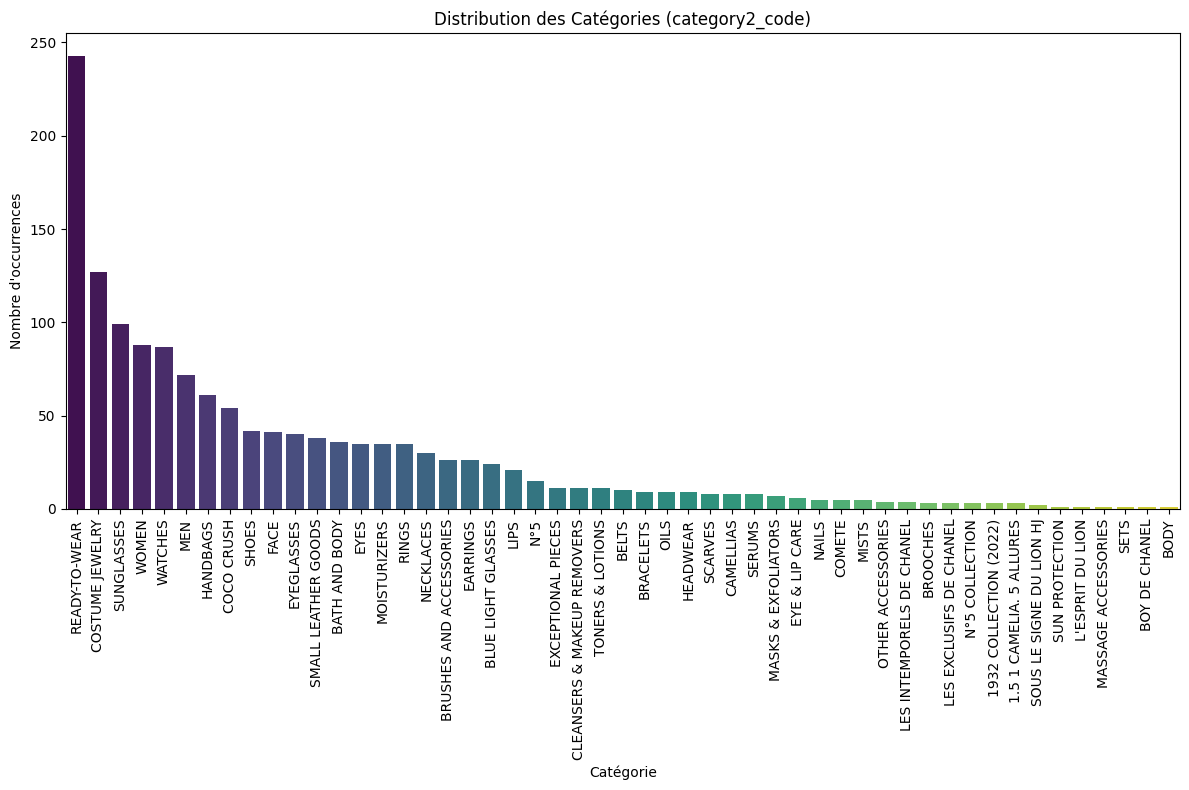

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=category2_counts.index, y=category2_counts.values, hue=category2_counts.index, palette='viridis', legend=False)
plt.title('Distribution des Catégories (category2_code)')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

On remarque que certaines catégories sont sur-représentés, tandis que d'autres sont sous-représentés. C'est un point auquel il faudra faire attention lors de la création du jeu d'entrainement afin d'éviter que le modèle se spécialise sur les catégories sur-représentées.

In [ ]:
category3_counts

category3_code
N.A.    1428
Name: count, dtype: int64

Enfin, l'attribut `category3_code` n'est composé que de valeurs non-assignée. Elle nous est donc inutile.

##### Brand, country, website name et currency

L'attribut `brand` pourrait aussi être pertinent à analyse. Regardons si la marque est assimilable à une catégorie.

In [ ]:
brand_counts = df['brand'].value_counts()
brand_counts

brand
CHANEL    1428
Name: count, dtype: int64

Cet attribut est donc inutile car tous les produits sont de la même marque (on aurait pû s'en douter).

On peut supposer la même chose pour les attributs `country_code` et `currency_code`. Vérifions cela.

In [ ]:
country_counts = df['country_code'].value_counts()
country_counts

country_code
DEU    1428
Name: count, dtype: int64

In [ ]:

currency_counts = df['currency_code'].value_counts()
currency_counts

currency_code
EUR    1428
Name: count, dtype: int64

Ces deux colonnes sont bien inutiles car composées d'une unique valeur.

L'attribut `website_name` pourrait, comme `brand` être le même partout, et donc non-assimilable à une catégorie. Vérifions cela.

In [ ]:

website_counts = df['website_name'].value_counts()
website_counts

website_name
Chanel    1428
Name: count, dtype: int64

Cette colonne est donc inutile.

##### Prices

On remarque que 4 attributs portent sur le prix des articles. Au premier coup d'oeil, les mêmes valeurs semblent se répéter d'une colonne à l'autre.

Voyons voir si les mêmes données sont présentes dans les colonnes `full_price`, `full_price_eur`, `price`, `price_eur`.

In [ ]:
# Vérifier si full_price et full_price_eur sont identiques
are_full_prices_identical = (df['full_price'] == df['full_price_eur']).all()
print(f"'full_price' et 'full_price_eur' sont-ils identiques ? {are_full_prices_identical}")

# Vérifier si price et price_eur sont identiques
are_prices_identical = (df['price'] == df['price_eur']).all()
print(f"'price' et 'price_eur' sont-ils identiques ? {are_prices_identical}")

# Vérifier si full_price et price sont toujours les mêmes (indiquant l'absence de réduction)
are_full_and_current_prices_identical = (df['full_price'] == df['price']).all()
print(f"'full_price' et 'price' sont-ils toujours les mêmes (pas de réduction) ? {are_full_and_current_prices_identical}")

'full_price' et 'full_price_eur' sont-ils identiques ? True
'price' et 'price_eur' sont-ils identiques ? True
'full_price' et 'price' sont-ils toujours les mêmes (pas de réduction) ? True


Les 4 sont identiques ! On peut donc se concentrer sur une seule d'entre elle. Price par exemple.

##### Competence date

À première vu, cet attribut n'est associé qu'à la valeur `2023-11-17`. Vérifions cela.

In [ ]:
competence_counts = df['competence_date'].value_counts()
competence_counts

competence_date
2023-11-17    1428
Name: count, dtype: int64

Cet attribut est donc inutile.

##### Product code et item url

On devine un lien entre `item_url` et `product_code`. Par exemple, la première ligne donne :

In [ ]:
first_row = df.iloc[0]
first_row_product_code = df.iloc[0]["product_code"]
print(f"Product code : {first_row_product_code}")
first_row_itemurl = df.iloc[0]["itemurl"]
print(f"Item url : {first_row_itemurl}")

Product code : PAS4152B13455
Item url : https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/


On comprend que l'url de l'item est composé d'une base `https://www.chanel.com/de/mode/`, du code produit dont la première lettre est séparée du reste, d'une suite à priori aléatoire, et enfin du nom du produit.

Ces colonnes n'ont qu'un intéret utilitaire en ce qu'elle permettent d'identifier de manière unique un produit et d'accéder à sa page associée.

Vérifions qu'il n'y a pas de doublons de product code.

In [ ]:
num_unique_product_codes = df['product_code'].nunique()
total_products = len(df)

print(f"Nombre de codes produit uniques : {num_unique_product_codes}")
print(f"Nombre total de produits : {total_products}")

Nombre de codes produit uniques : 1428
Nombre total de produits : 1428


`product_code` est donc fiable comme identifiant unique.

##### Flag discount

Il semblerait que la colonne `flag_discount` indique la présence ou non d'une promotion. Voyons voir si elle est binaire ou non.

In [ ]:
flg_discount_counts = df['flg_discount'].value_counts()
print("Valeurs uniques et leurs occurrences dans 'flg_discount':")
flg_discount_counts

Valeurs uniques et leurs occurrences dans 'flg_discount':


flg_discount
0    1428
Name: count, dtype: int64

Tous les articles sont à 0. Cet attribut ne sert donc à rien.

##### Images

Nous allons essayer de charges les images correspondant aux URL.
Nous supposons que certaines images ne sont plus disponibles.

Pour alléger le processus de téléchargement, nous allons essayer de charger seulement les images qui ont une URL encore valide. Pour cela, nous pouvons utiliser la méthode http `HEAD` qui va demander au serveur la même réponse que pour un `GET` mais sans le contenu.

**Attention** : Cette action peut prendre 7 minutes (d'expérience).

In [ ]:
import requests
from tqdm.notebook import tqdm

def check_image_url(url):
    try:
        response = requests.head(url, allow_redirects=True, timeout=5)
        return response.status_code == 200
    except requests.exceptions.RequestException:
        return False

# Add a progress bar for checking URLs
tqdm.pandas(desc="Checking image URLs")
df['image_url_valid'] = df['imageurl'].progress_apply(check_image_url)

Checking image URLs:   0%|          | 0/1428 [00:00<?, ?it/s]

In [ ]:
image_url_valid_count = df['image_url_valid'].sum()
image_url_invalid_count = len(df) - image_url_valid_count
print("Nombre d'URL d'images valides :", df['image_url_valid'].sum())
print("Nombre d'URL d'images invalides :", len(df) - df['image_url_valid'].sum())
print("Pourcentage d'URL d'images valides :", (df['image_url_valid'].sum() / len(df)) * 100, "%")

display(df.head())

Nombre d'URL d'images valides : 900
Nombre d'URL d'images invalides : 528
Pourcentage d'URL d'images valides : 63.02521008403361 %


brand category1_code      category2_code category3_code competence_date  \
0  CHANEL        FASHION            HANDBAGS           N.A.      2023-11-17   
1  CHANEL        FASHION            HANDBAGS           N.A.      2023-11-17   
2  CHANEL        EYEWEAR  BLUE LIGHT GLASSES           N.A.      2023-11-17   
3  CHANEL        EYEWEAR          SUNGLASSES           N.A.      2023-11-17   
4  CHANEL        EYEWEAR          SUNGLASSES           N.A.      2023-11-17   

  country_code currency_code  flg_discount  full_price  full_price_eur  \
0          DEU           EUR             0      5200.0          5200.0   
1          DEU           EUR             0      5750.0          5750.0   
2          DEU           EUR             0       420.0           420.0   
3          DEU           EUR             0       580.0           580.0   
4          DEU           EUR             0       480.0           480.0   

                                            imageurl  \
0  https://res.cloudinary.com/dwayrkp5z/image/fet...   
1  https://res.cloudinary.com/dwayrkp5z/image/fet...   
2  https://res.cloudinary.com/dwayrkp5z/image/fet...   
3  https://res.cloudinary.com/dwayrkp5z/image/fet...   
4  https://res.cloudinary.com/dwayrkp5z/image/fet...   

                                             itemurl   price  price_eur  \
0  https://www.chanel.com/de/mode/p/AS4152B13455N...  5200.0     5200.0   
1  https://www.chanel.com/de/mode/p/A67085Y099539...  5750.0     5750.0   
2  https://www.chanel.com/de/brillen/p/A71441X081...   420.0      420.0   
3  https://www.chanel.com/de/brillen/p/A71449X099...   580.0      580.0   
4  https://www.chanel.com/de/brillen/p/A71466X010...   480.0      480.0   

    product_code                                              title  \
0  PAS4152B13455  Tweed & goldfarbenes Metall  Schwarz  Rosa & B...   
1  PA67085Y09953                                               n.a.   
2        PA71441                                            Schwarz   
3        PA71449           Silberfarben. Gläser: Braun  Mit Verlauf   
4        PA71466             Blau & Rosa. Gläser: Grau  Mit Verlauf   

  website_name  image_url_valid  
0       Chanel             True  
1       Chanel            False  
2       Chanel             True  
3       Chanel             True  
4       Chanel             True

Seulement deux tiers des images sont disponibles !

Nous allons maintenant charger les images. Elles seront stockées dans le dossier `img`. Nous allons chercher à observer la taille des images ainsi que leur format.

Pour commencer on cŕeer le dossier si il n'existe pas.

In [ ]:
import os
image_dir = 'img'
processed_img_dir = 'processed_img'
os.makedirs(image_dir, exist_ok=True)
os.makedirs(processed_img_dir, exist_ok=True)

On va essayer de charger seulement les images qui ont une URL valide. Certaines images avaient des formats particuliers comme RGBA ou palette, on les convertis en RGB pour unifier. On analyse ensuite le format d'origine de l'image, sa largeur et sa hauteur.

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import pandas as pd

image_data = []

# Filter DataFrame for valid image URLs
valid_images_df = df[df['image_url_valid'] == True]

for index, row in tqdm(valid_images_df.iterrows(), total=len(valid_images_df), desc="Downloading and processing images"):
    product_code = row['product_code']
    image_url = row['imageurl']
    filename = os.path.join(image_dir, f"{product_code}.jpg") # Assuming most images will be JPG/JPEG, will verify format below

    try:
        response = requests.get(image_url, timeout=10)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)

        img = Image.open(BytesIO(response.content))

        # Convert image to RGB mode if it's not already, to prevent 'cannot write mode P as JPEG' error
        if img.mode == 'P' or img.mode == 'RGBA':
            img = img.convert('RGB')

        img.save(filename) # Save with its detected format later

        # Get image format and dimensions
        img_format = img.format if img.format else 'UNKNOWN'
        img_size = img.size # (width, height)

        image_data.append({
            'product_code': product_code,
            'image_format': img_format,
            'image_width': img_size[0],
            'image_height': img_size[1]
        })

    except requests.exceptions.RequestException as e:
        print(f"Error downloading {image_url}: {e}")
    except IOError as e:
        print(f"Error processing image {image_url}: {e}")

# Create a DataFrame from the collected image data
image_info_df = pd.DataFrame(image_data)

print(f"Successfully processed {len(image_info_df)} images.")

# Display the head of the new DataFrame
print("\nImage Information DataFrame Head:")
display(image_info_df.head())

# Summarize findings regarding image formats and sizes
print("\nSummary of Image Formats:")
print(image_info_df['image_format'].value_counts())

print("\nSummary of Image Sizes (Width x Height):")
print(image_info_df['image_width'].describe())
print(image_info_df['image_height'].describe())

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Successfully processed 900 images.

Image Information DataFrame Head:


product_code image_format  image_width  image_height
0  PAS4152B13455         JPEG          378           400
1        PA71441         JPEG          378           400
2        PA71449         JPEG          378           400
3        PA71466         JPEG          378           400
4        PA71481         JPEG          378           400


Summary of Image Formats:
image_format
JPEG       625
UNKNOWN    275
Name: count, dtype: int64

Summary of Image Sizes (Width x Height):
count    900.000000
mean     310.787778
std      107.651771
min       20.000000
25%      226.000000
50%      378.000000
75%      378.000000
max      392.000000
Name: image_width, dtype: float64
count    900.000000
mean     361.165556
std       75.152617
min       41.000000
25%      348.750000
50%      400.000000
75%      400.000000
max      400.000000
Name: image_height, dtype: float64


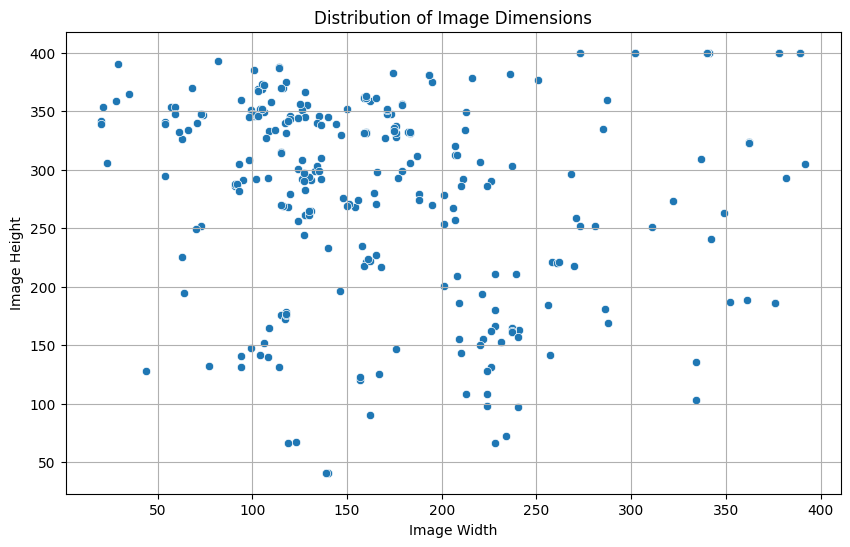

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='image_width', y='image_height', data=image_info_df)
plt.title('Distribution of Image Dimensions')
plt.xlabel('Image Width')
plt.ylabel('Image Height')
plt.grid(True)
plt.show()

On observe que les tailles sont assez dispersées. Mais l'orientation des images influe. Normalisons.

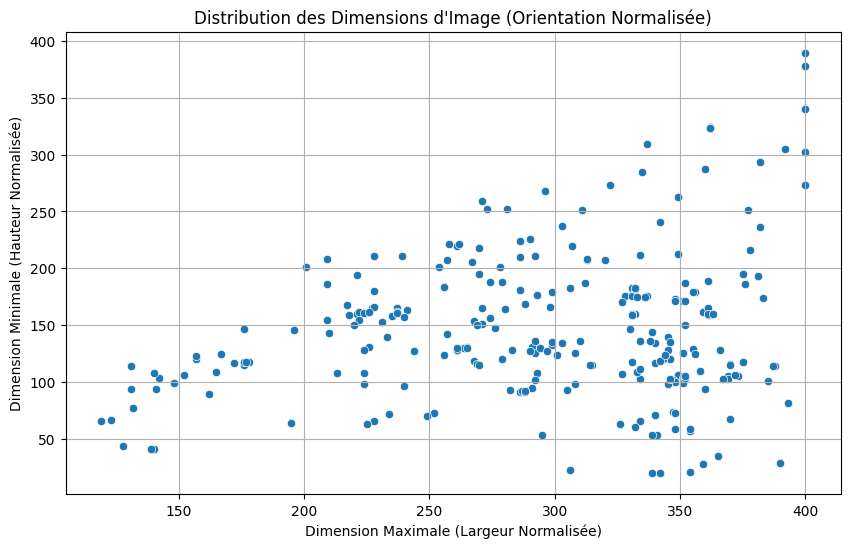

Descriptive statistics for normalized dimensions:


normalized_width  normalized_height
count        900.000000         900.000000
mean         367.185556         304.767778
std           61.659675         112.938565
min          119.000000          20.000000
25%          353.500000         187.750000
50%          400.000000         378.000000
75%          400.000000         378.000000
max          400.000000         389.000000

In [ ]:
image_info_df['normalized_width'] = image_info_df.apply(lambda row: max(row['image_width'], row['image_height']), axis=1)
image_info_df['normalized_height'] = image_info_df.apply(lambda row: min(row['image_width'], row['image_height']), axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='normalized_width', y='normalized_height', data=image_info_df)
plt.title('Distribution des Dimensions d\'Image (Orientation Normalisée)')
plt.xlabel('Dimension Maximale (Largeur Normalisée)')
plt.ylabel('Dimension Minimale (Hauteur Normalisée)')
plt.grid(True)
plt.show()

print("Descriptive statistics for normalized dimensions:")
display(image_info_df[['normalized_width', 'normalized_height']].describe())

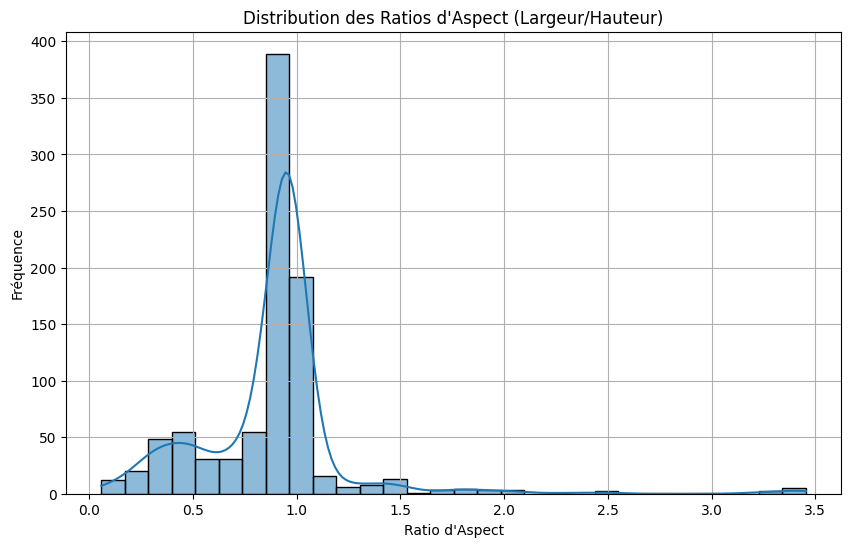

Descriptive statistics for aspect ratio:


count    900.000000
mean       0.883373
std        0.364698
min        0.058480
25%        0.773529
50%        0.945000
75%        0.972500
max        3.454545
Name: aspect_ratio, dtype: float64

In [ ]:
image_info_df['aspect_ratio'] = image_info_df['image_width'] / image_info_df['image_height']

plt.figure(figsize=(10, 6))
sns.histplot(image_info_df['aspect_ratio'], bins=30, kde=True)
plt.title('Distribution des Ratios d\'Aspect (Largeur/Hauteur)')
plt.xlabel('Ratio d\'Aspect')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

print("Descriptive statistics for aspect ratio:")
display(image_info_df['aspect_ratio'].describe())

On observe qu'une tendance se dégage et qu'un ratio de `0.88` serait le plus optimal pour une normalisation des images.

##### Conclusion de l'exploration initiale

Nous avons pu identifier les attributs utiles pour la suite du projet de recommandation.

Plusieurs points :

1. **Structure des données :**
   Le dataset, initialement sous forme de json, a été aplati.

2. **Attributs inutiles ou redondants :**

   * Valeurs `'n.a.'` dans `title`.
   * Colonnes invariantes : `brand`, `country_code`, `currency_code`, `website_name`, `competence_date`.
   * `category3_code` : uniquement `'N.A.'`.
   * Prix : `full_price`, `full_price_eur`, `price`, `price_eur` → doublons
   * Pas de promotions (`flg_discount = 0`).

3. **Attributs pertinents :**

   * **Identifiant unique :** `product_code`.
   * **Catégories :** `category1_code` (dominée par `FASHION`) et `category2_code` (variée mais sur-représentation de `READY-TO-WEAR`).
   * **Contenus multimodaux :** `title` (texte), `imageurl` (visuel).
   * **Prix :** une seule colonne de prix à conserver.

4. **Analyse des images :**

   * ~63% des URL valides ; images téléchargées localement.
   * Majorité en JPEG, dimensions autour de **400x378** ou **400x400**, ratio moyen ≈ **0.88** (quasi carré).

### 2. Préparation des données

#### Se débarrasser des colonnes inutiles

On commence par se débarasser des colonnes identifées comme inutiles.

In [ ]:
print(df.columns)

NameError: name 'df' is not defined

In [ ]:
# Liste des colonnes à garder
useful_columns = ['product_code', 'category2_code', 'title', 'price', 'imageurl', 'image_url_valid']

# Créer un nouveau DataFrame avec uniquement ces colonnes
df_clean = df[useful_columns].copy()
print("Colonnes conservées :", df_clean.columns)
display(df_clean.head())

Colonnes conservées : Index(['product_code', 'category2_code', 'title', 'price', 'imageurl',
       'image_url_valid'],
      dtype='object')


product_code      category2_code  \
0  PAS4152B13455            HANDBAGS   
1  PA67085Y09953            HANDBAGS   
2        PA71441  BLUE LIGHT GLASSES   
3        PA71449          SUNGLASSES   
4        PA71466          SUNGLASSES   

                                               title   price  \
0  Tweed & goldfarbenes Metall  Schwarz  Rosa & B...  5200.0   
1                                               n.a.  5750.0   
2                                            Schwarz   420.0   
3           Silberfarben. Gläser: Braun  Mit Verlauf   580.0   
4             Blau & Rosa. Gläser: Grau  Mit Verlauf   480.0   

                                            imageurl  image_url_valid  
0  https://res.cloudinary.com/dwayrkp5z/image/fet...             True  
1  https://res.cloudinary.com/dwayrkp5z/image/fet...            False  
2  https://res.cloudinary.com/dwayrkp5z/image/fet...             True  
3  https://res.cloudinary.com/dwayrkp5z/image/fet...             True  
4  https://res.cloudinary.com/dwayrkp5z/image/fet...             True

In [ ]:
#Vérifier qu’il n’y a pas de colonnes vides ou redondantes
print(df_clean.isna().sum())

product_code       0
category2_code     0
title              0
price              0
imageurl           0
image_url_valid    0
dtype: int64


#### Se débarasser des lignes dont on n'a pas l'image

D'après l'analyse précédente, seul 63% des données du Dataset sont associées à une image. On ne va donc garder que celles-ci.

In [ ]:
print(f"Shape of df_clean before filtering: {df_clean.shape}")

df_clean = df_clean[df_clean['image_url_valid'] == True].copy()

print(f"Shape of df_clean after filtering: {df_clean.shape}")
print("\nNull values in filtered df_clean:")
print(df_clean.isna().sum())

Shape of df_clean before filtering: (1428, 6)
Shape of df_clean after filtering: (900, 6)

Null values in filtered df_clean:
product_code       0
category2_code     0
title              0
price              0
imageurl           0
image_url_valid    0
dtype: int64


#### Se débarasser des lignes dont on n'a pas le titre

Débarassons nous des lignes qui avaient des valeurs comme `'n.a.'`

In [ ]:
print(f"Shape of df_clean before filtering titles: {df_clean.shape}")

patterns_to_remove = ['n.a.', 'N.A.', 'na', 'NA', 'nan', 'N/A', '', 'None']
df_clean = df_clean[~df_clean['title'].isin(patterns_to_remove)].copy()

print(f"Shape of df_clean after filtering titles: {df_clean.shape}")
print("\nNull values in filtered df_clean:")
print(df_clean.isna().sum())

Shape of df_clean before filtering titles: (900, 6)
Shape of df_clean after filtering titles: (900, 6)

Null values in filtered df_clean:
product_code       0
category2_code     0
title              0
price              0
imageurl           0
image_url_valid    0
dtype: int64


Visiblement l'opération précédente avait enlevé les lignes identifiées.

#### Normaliser les images

Un ensemble de techniques peuvent être utilisées pour normaliser les images en python [[sources](https://medium.com/@maahip1304/the-complete-guide-to-image-preprocessing-techniques-in-python-dca30804550c)].

Liste non exhaustive :
- Redimensionnement :
  - Crop : élimine des parties de l’image, donc entraîne une perte d’information.
  - Resize : conserve tout le contenu mais déforme l’image en cas de changement de ratio.
- Ajustement des couleurs :
  - Grayscaling : convertit l’image en niveaux de gris, ce qui réduit fortement l’information.
  - Conversion des palettes : unifie le format (par exemple, passer systématiquement en RGB plutôt que RGBA ou d'autres palettes).
  - Binarisation : transforme l’image en noir et blanc.
  - Amélioration du contraste : homogénéise la dynamique lumineuse pour aider les modèles à mieux capter les variations pertinentes.
- Normalisation : rééchelonne l’intensité des pixels entre 0 et 1 (ce qui améliore généralement la stabilité et les performances des modèles).

Dans notre cas, nous utiliserons les techniques suivantes : crop et resize combinés (en appliquant un crop lorsque le ratio dépasse un certain seuil, puis un redimensionnement), conversion des palettes, amélioration du contraste et normalisation.

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
from tqdm.notebook import tqdm
import cv2

In [ ]:
def preprocess_image_opencv(img_cv):
    # 0. Add white padding to make the image square
    h, w = img_cv.shape[:2]
    if h == w:
        squared_img = img_cv.copy()
    else:
        # Determine the size of the square
        size = max(h, w)
        squared_img = np.ones((size, size, 3), dtype=np.uint8) * 255  # white background

        # Compute offsets to center the original image
        y_offset = (size - h) // 2
        x_offset = (size - w) // 2

        # Place the original image in the center
        squared_img[y_offset:y_offset + h, x_offset:x_offset + w] = img_cv

    # 1. Resize: shorter side → 256px (now the image is square so both sides = same)
    resized_img = cv2.resize(squared_img, (256, 256), interpolation=cv2.INTER_AREA)

    # 2. Center crop to 224x224
    # start = (256 - 224) // 2
    # cropped_img = resized_img[start:start + 224, start:start + 224]

    # 3. Contrast enhancement
    # alpha = 1   # contrast
    # beta = 0    # brightness
    # contrasted_img = cv2.convertScaleAbs(cropped_img, alpha=alpha, beta=beta)

    # 4. Normalize [0,1]
    normalized_img = resized_img.astype(np.float32) / 255.0

    return normalized_img


On ne garde que le resize et la normalisation pour les raisons expliquées ci-dessous.

In [ ]:
image_data = []

# Get a list of all image files in the image_dir
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

for filename_with_ext in tqdm(image_files, total=len(image_files), desc="Processing local images"):
    product_code = os.path.splitext(filename_with_ext)[0] # Extract product_code from filename
    input_image_path = os.path.join(image_dir, filename_with_ext)
    output_image_path = os.path.join(processed_img_dir, f"{product_code}.jpg") # Save as JPG

    try:
        # Load image using OpenCV
        img_cv = cv2.imread(input_image_path)

        if img_cv is None:
            print(f"Error: Could not load image {input_image_path}. Skipping.")
            continue

        # Call the preprocessing function
        processed_normalized_img = preprocess_image_opencv(img_cv)

        # Convert back to uint8 for saving as JPEG (scale from 0-1 to 0-255)
        save_img = (processed_normalized_img * 255).astype(np.uint8)
        cv2.imwrite(output_image_path, save_img)

        # Collect information about the preprocessed image
        image_data.append({
            'product_code': product_code,
            'image_format': 'JPEG', # All saved as JPEG
            'image_width': 224,     # Fixed width after processing
            'image_height': 224     # Fixed height after processing
        })

    except Exception as e:
        print(f"Unexpected error processing {input_image_path}: {e}")


# Create a DataFrame from the collected image data
image_info_df = pd.DataFrame(image_data)

print(f"Successfully processed {len(image_info_df)} images.")

print("\nImage Information DataFrame Head:")
display(image_info_df.head())

print("\nSummary of Image Formats:")
print(image_info_df['image_format'].value_counts())

print("\nSummary of Image Sizes (Width x Height):")
print(image_info_df['image_width'].describe())
print(image_info_df['image_height'].describe())

NameError: name 'image_dir' is not defined

Nous avons finalement décidé de garder un paramètre `alpha enhancement` à 1 (ne rien faire) car des valeurs supérieurs éclaircissaient de manière trop forte l'ensemble des images, rendant certains articles invisible (certainement car `PNG` à l'origine, passage au `JPG` a mis les pixels invisibles en blanc).  


Avec 1 :

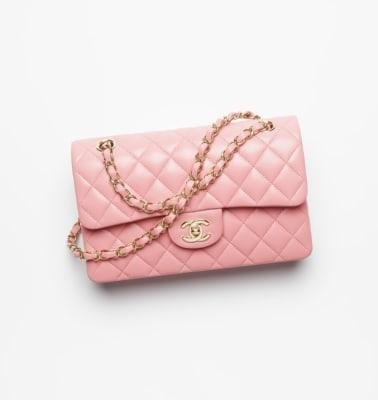

Avec 1.5 :

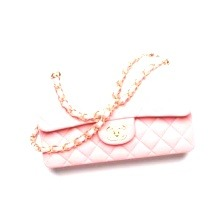

Les images longues donnent des résultats particulièrement mauvais.

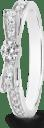

Une fois crop

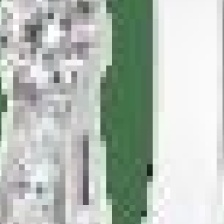

Pour pallier à cela, nous avons implémenté une étape de padding afin de faire des images des carrés parfait par défaut

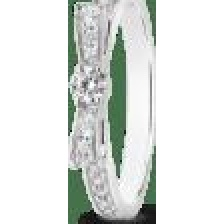

Puisque notre méthode de padding carré permet d'éviter les déformations, et que les ratios extrèmes sont rares, nous enlevons le crop

##### Enlever les lignes des catégories sous-représentées

Comme vu précédemment, certaines catégories sont sous-représentées, certainement encore plus après la supression des données sans image. Nous allons les enlever en mettant un seuil d'au moins 10 articles dans une même catégorie.

In [ ]:
print(f"Shape of df_clean before removing under-represented categories: {df_clean.shape}")

# Count occurrences of each category
category_counts = df_clean['category2_code'].value_counts()

# Identify categories with less than 10 items
categories_to_remove = category_counts[category_counts < 10].index

# Filter df_clean to remove these categories
df_clean = df_clean[~df_clean['category2_code'].isin(categories_to_remove)].copy()

print(f"Shape of df_clean after removing under-represented categories: {df_clean.shape}")
print("\nValue counts of remaining categories:")
print(df_clean['category2_code'].value_counts())

Shape of df_clean before removing under-represented categories: (900, 6)
Shape of df_clean after removing under-represented categories: (814, 6)

Value counts of remaining categories:
category2_code
READY-TO-WEAR              236
COSTUME JEWELRY            124
SUNGLASSES                  90
EYEGLASSES                  35
WOMEN                       34
HANDBAGS                    32
SHOES                       28
FACE                        27
MEN                         26
BRUSHES AND ACCESSORIES     25
SMALL LEATHER GOODS         25
WATCHES                     24
EYES                        22
BATH AND BODY               22
BLUE LIGHT GLASSES          20
EARRINGS                    18
MOISTURIZERS                13
LIPS                        13
Name: count, dtype: int64


### 3. Visualisation

Une fois notre prétraitement réalisé, notre jeu de données à été réduit. Regardons les nouvelles distributions que cela nous donne.

##### Catégories de produits

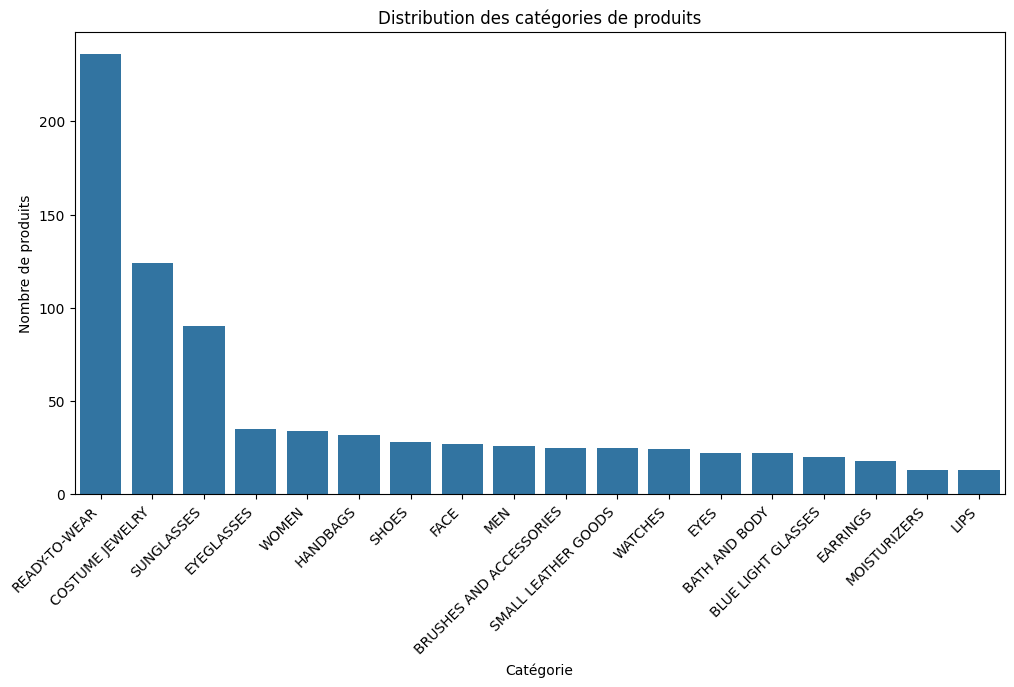

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category2_code', data=df_clean,
              order=df_clean['category2_code'].value_counts().index)
plt.title("Distribution des catégories de produits")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Catégorie")
plt.ylabel("Nombre de produits")
plt.show()


##### Prix des produits

Tout produit confondu, on observe un prix médian de 1275EUR. On peut supposer cependant que cette distribution varie en fonction du type de produit.

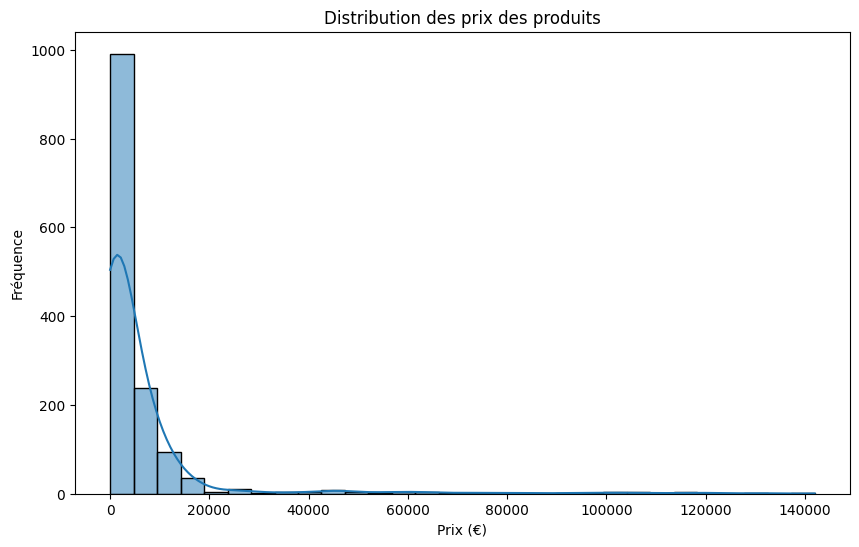

count      814.000000
mean      3064.241179
std       4002.967612
min         26.000000
25%        400.000000
50%       1345.000000
75%       4800.000000
max      44600.000000
Name: price, dtype: float64

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'].dropna(), bins=30, kde=True)
plt.title("Distribution des prix des produits")
plt.xlabel("Prix (€)")
plt.ylabel("Fréquence")
plt.show()

df_clean['price'].describe()

Maintenant voyons le prix pour chaque catégorie de `category2_code`.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

unique_categories = df_clean['category2_code'].unique()
n_categories = len(unique_categories)

# Calculate optimal grid size for subplots
n_cols = 2 # You can adjust this for better layout
n_rows = math.ceil(n_categories / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Adjust figure size dynamically

for i, category in enumerate(unique_categories):
    plt.subplot(n_rows, n_cols, i + 1) # Create subplot
    sns.histplot(df_clean[df_clean['category2_code'] == category]['price'].dropna(), bins=15, kde=True)
    plt.title(f'Prix dans la catégorie: {category}', fontsize=10) # Set title for subplot
    plt.xlabel('Prix (€)', fontsize=8)
    plt.ylabel('Fréquence', fontsize=8)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.suptitle('Distribution des prix par catégorie', y=1.02, fontsize=16) # Overall title
plt.show()

NameError: name 'df_clean' is not defined

In [ ]:
top_categories = df['category2_code'].value_counts().head(3).index
print("Catégories principales :", top_categories)

Catégories principales : Index(['READY-TO-WEAR', 'COSTUME JEWELRY', 'SUNGLASSES'], dtype='object', name='category2_code')



Exemples pour la catégorie: READY-TO-WEAR


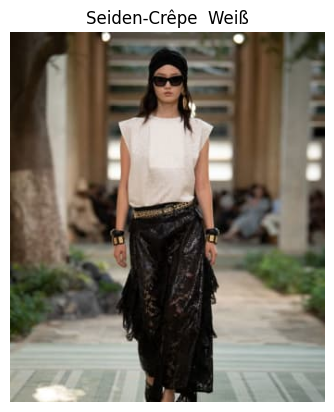

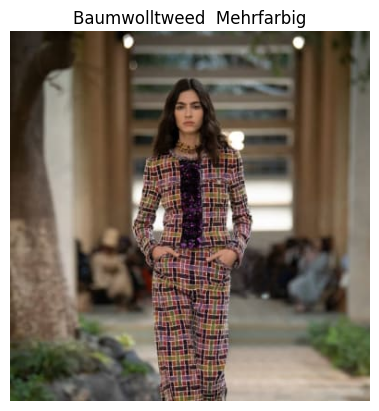

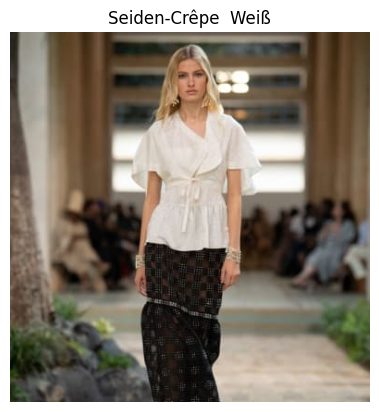

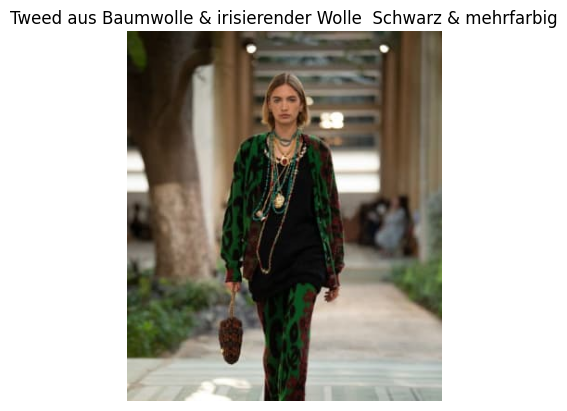


Exemples pour la catégorie: COSTUME JEWELRY


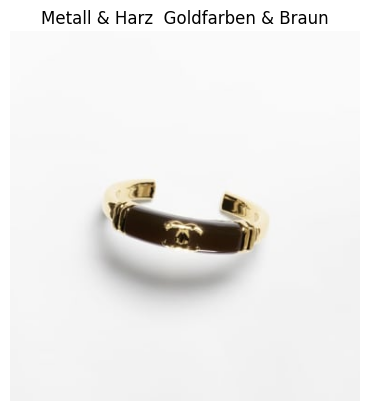

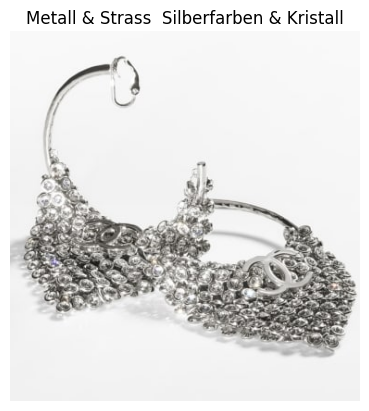

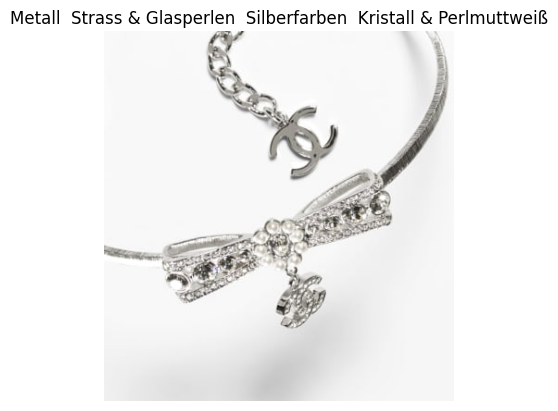

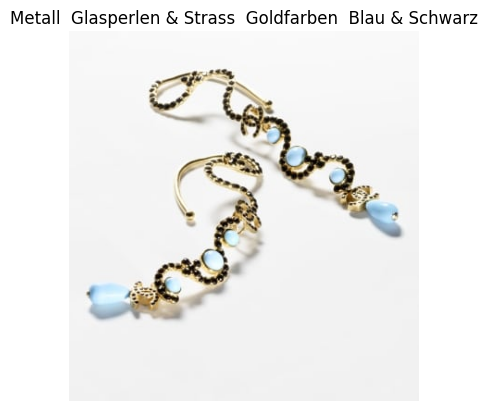


Exemples pour la catégorie: SUNGLASSES


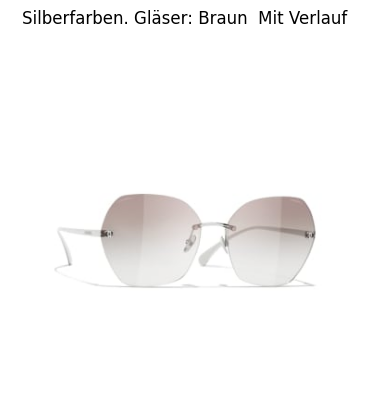

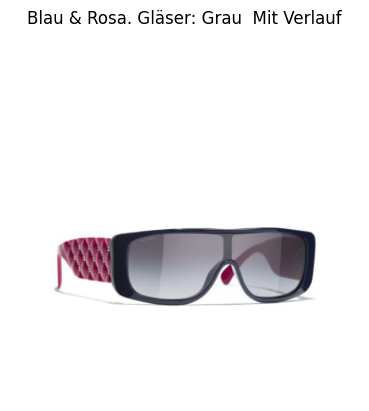

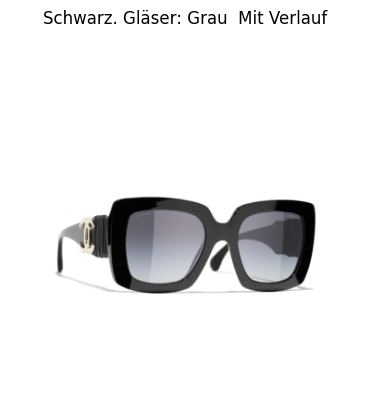

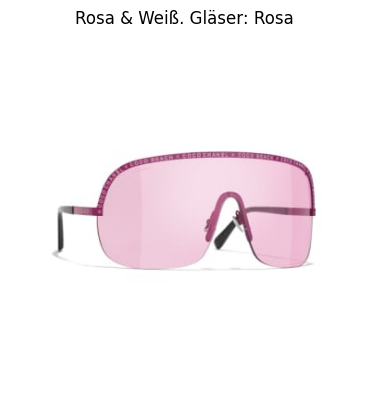

In [ ]:
from PIL import Image
import requests
from io import BytesIO

for category in top_categories:
    subset = df[(df['category2_code'] == category) & (df['image_url_valid'])].head(4)
    print(f"\nExemples pour la catégorie: {category}")
    for _, row in subset.iterrows():
        try:
            response = requests.get(row['imageurl'], timeout=10)
            img = Image.open(BytesIO(response.content)).convert('RGB')
            plt.imshow(img)
            plt.axis("off")
            plt.title(row['title'])
            plt.show()
        except Exception as e:
            print(f"Erreur pour {row['imageurl']}: {e}")

## Partie 2 : Comparaison des embeddings visuels

Dans cette deuxième partie, nous allons extraire et comparer des **embeddings visuels** des images de produits Chanel en utilisant trois approches différentes :

1. **Méthode 1** : CNN personnalisé entraîné pour la classification
2. **Méthode 2** : Modèles pré-entraînés (CLIP, ResNet, Vision Transformer)
3. **Méthode 3 (BONUS)** : Self-supervised learning (SimSiam/VICReg)

**Objectif :** Comparer la qualité des embeddings générés par chaque méthode en analysant :
- La **cohérence intra-classe** (similarité entre produits de même catégorie)
- Les **distances inter-classe** (séparation entre catégories différentes)
- Les **regroupements visuels** via t-SNE/UMAP

### 1. Méthodes pour extraitre les embeddings visuels

## **Méthode 1 : CNN Personnalisé pour Classification**

Cette première approche consiste à entraîner un **réseau de neurones convolutifs (CNN) from scratch** pour classifier les images selon `category2_code`, puis extraire les embeddings d'une couche intermédiaire.

**Avantages :**
- Adapté spécifiquement aux données Chanel
- Capture les features pertinentes pour ce domaine

**Inconvénients :**
- Nécessite beaucoup de données d'entraînement
- Risque de sur-apprentissage avec un petit dataset

#### 1.1 Entraîner un modèle CNN pour classifier les images

Pour commencer, nous allons créer notre propre modèle CNN afin de faire la classification des images traitées précédemment.


Pour cela, on commence par définir ce qui sera notre entrée et notre sortie. Ici, notre entrée sera l'ensemble des images que nous avons modifiées pour qu'elles aient le même format, et notre sortie sera la catégorie à laquelle chaque image appartient.

Pour que le modèle puisse lire les images, on va créer une fonction qui va prendre le chemin de chaque image et la charger dans **une liste X** (notre entrée) en tant que liste de pixels.

In [ ]:
from os import listdir
import tensorflow
from tensorflow.keras.preprocessing import image as kimg
import matplotlib.image as mpimg

In [ ]:
# Function to load images from their path
def load_images_from_folder(folder, img_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = kimg.load_img(img_path, target_size=img_size)
        img_array = kimg.img_to_array(img)

        # We need to normalize images to avoid matplotlib clipping them in order to display them
        # print(f"Original array range: [{img_array.min():.1f}, {img_array.max():.1f}]")
        # print(f"Data type: {img_array.dtype}")

        # If values are 0-255 floats, normalize to 0-1
        if img_array.max() > 1.0 and img_array.dtype in [np.float32, np.float64]:
            # print("Normalizing from [0, 255] to [0, 1]")
            img_array = img_array / 255.0

        # If integers, convert to float and normalize
        elif img_array.dtype in [np.uint8, np.int32, np.int64]:
            # print("Converting integers to float and normalizing")
            img_array = img_array.astype(np.float32) / 255.0

        images.append(img_array)
    return np.array(images)

In [ ]:
# define input (X) and output (y)
X = load_images_from_folder("processed_img/")
y = df_clean['category2_code']
print(y)

FileNotFoundError: [Errno 2] No such file or directory: 'processed_img/'

Vérifions que X contienne bien les images précédentes :

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

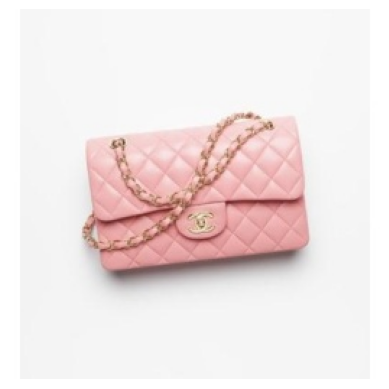

In [ ]:
# First image from 'processed' folder
img = mpimg.imread("/content/processed_img/PA01113B10583.jpg")
plt.imshow(img)
plt.axis("off")

HANDBAGS


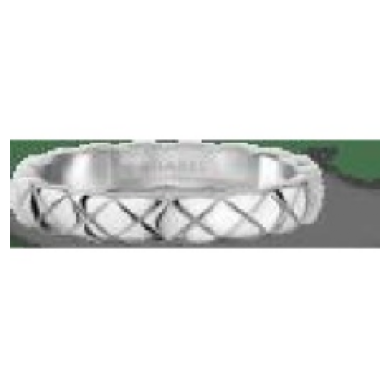

In [ ]:
# First input image
plt.imshow(X[0])
plt.axis("off")

print(y[0])

Ah, on remarque que ce ne sont pas les mêmes images, mais que la seconde reste de même qualité. Cela nous dit quand même que les images dans le dossier ne sont pas triées de la même façon que les images dans X, ce qui pose problème puisque les catégories dans y ne vont pas correspondre au bon produit.

In [ ]:
df_clean.head()

product_code      category2_code  \
0  PAS4152B13455            HANDBAGS   
2        PA71441  BLUE LIGHT GLASSES   
3        PA71449          SUNGLASSES   
4        PA71466          SUNGLASSES   
5        PA71481          SUNGLASSES   

                                               title   price  \
0  Tweed & goldfarbenes Metall  Schwarz  Rosa & B...  5200.0   
2                                            Schwarz   420.0   
3           Silberfarben. Gläser: Braun  Mit Verlauf   580.0   
4             Blau & Rosa. Gläser: Grau  Mit Verlauf   480.0   
5                 Schwarz. Gläser: Grau  Mit Verlauf   620.0   

                                            imageurl  image_url_valid  
0  https://res.cloudinary.com/dwayrkp5z/image/fet...             True  
2  https://res.cloudinary.com/dwayrkp5z/image/fet...             True  
3  https://res.cloudinary.com/dwayrkp5z/image/fet...             True  
4  https://res.cloudinary.com/dwayrkp5z/image/fet...             True  
5  https://res.cloudinary.com/dwayrkp5z/image/fet...             True

On remarque également que l'indexation ne se refait pas toute seule. Ici par exemple, on ne peut plus accéder à la première ligne. Réglons ça maintenant :

In [ ]:
# re indexing
df_clean_indexed = df_clean.reset_index(drop=True)

df_clean_indexed.head()

product_code      category2_code  \
0  PAS4152B13455            HANDBAGS   
1        PA71441  BLUE LIGHT GLASSES   
2        PA71449          SUNGLASSES   
3        PA71466          SUNGLASSES   
4        PA71481          SUNGLASSES   

                                               title   price  \
0  Tweed & goldfarbenes Metall  Schwarz  Rosa & B...  5200.0   
1                                            Schwarz   420.0   
2           Silberfarben. Gläser: Braun  Mit Verlauf   580.0   
3             Blau & Rosa. Gläser: Grau  Mit Verlauf   480.0   
4                 Schwarz. Gläser: Grau  Mit Verlauf   620.0   

                                            imageurl  image_url_valid  
0  https://res.cloudinary.com/dwayrkp5z/image/fet...             True  
1  https://res.cloudinary.com/dwayrkp5z/image/fet...             True  
2  https://res.cloudinary.com/dwayrkp5z/image/fet...             True  
3  https://res.cloudinary.com/dwayrkp5z/image/fet...             True  
4  https://res.cloudinary.com/dwayrkp5z/image/fet...             True

Il faut maintenant faire en sorte que les images dans le dossier soient classés dans X dans le même ordre que dans le dataframe. Pour cela, on peut parcourir la colonne 'product_code' du dataframe et ajouter à X l'image dans le dossier qui correspond au code du produit.

Nous allons définir une nouvelle fonction load_img_from_folder, qui contrairement à la précedente, ne va pas parcourir toutes les images dans le dossier, mais va prendre en argument le nom d'une image (product_code.jpg) et va chercher cette image uniquement dans le dossier pour la charger. De cette manière, on peut parcourir le dataframe et appeler cette fonction pour chaque ligne afin de mettre les images dans X dans le même ordre que le dataframe.

In [ ]:
def load_img_from_folder(folder, product_code, img_size=(224,224)):
  img_path = os.path.join(folder, product_code + ".jpg")
  img = kimg.load_img(img_path, target_size=img_size)
  img_array = kimg.img_to_array(img)

  # We need to normalize images to avoid matplotlib clipping them in order to display them
  # print(f"Original array range: [{img_array.min():.1f}, {img_array.max():.1f}]")
  # print(f"Data type: {img_array.dtype}")

  # Option A: If values are 0-255 floats, normalize to 0-1
  if img_array.max() > 1.0 and img_array.dtype in [np.float32, np.float64]:
      # print("Normalizing from [0, 255] to [0, 1]")
      img_array = img_array / 255.0

  # Option B: If integers, convert to float and normalize
  elif img_array.dtype in [np.uint8, np.int32, np.int64]:
      # print("Converting integers to float and normalizing")
      img_array = img_array.astype(np.float32) / 255.0

  return np.array(img_array)

On peut maintenant redéfinir X :

In [ ]:
X = []
for index in range(df_clean_indexed.shape[0]):
  new_img = load_img_from_folder("processed_img/", df_clean_indexed['product_code'][index])
  X.append(new_img)

Vérifions que les images dans X soient dans le même ordre que les textes dans y :

In [ ]:
df_clean_indexed.head()

product_code      category2_code  \
0  PAS4152B13455            HANDBAGS   
1        PA71441  BLUE LIGHT GLASSES   
2        PA71449          SUNGLASSES   
3        PA71466          SUNGLASSES   
4        PA71481          SUNGLASSES   

                                               title   price  \
0  Tweed & goldfarbenes Metall  Schwarz  Rosa & B...  5200.0   
1                                            Schwarz   420.0   
2           Silberfarben. Gläser: Braun  Mit Verlauf   580.0   
3             Blau & Rosa. Gläser: Grau  Mit Verlauf   480.0   
4                 Schwarz. Gläser: Grau  Mit Verlauf   620.0   

                                            imageurl  image_url_valid  
0  https://res.cloudinary.com/dwayrkp5z/image/fet...             True  
1  https://res.cloudinary.com/dwayrkp5z/image/fet...             True  
2  https://res.cloudinary.com/dwayrkp5z/image/fet...             True  
3  https://res.cloudinary.com/dwayrkp5z/image/fet...             True  
4  https://res.cloudinary.com/dwayrkp5z/image/fet...             True

BLUE LIGHT GLASSES


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

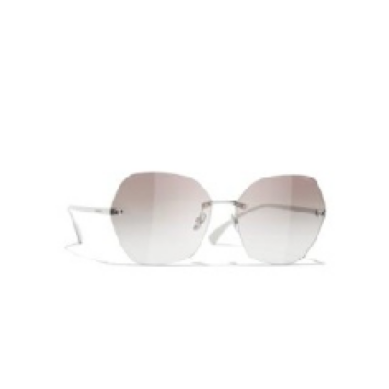

In [ ]:
print(y[2])
img = X[2]
plt.imshow(img)
plt.axis("off")

Et voilà! Maintenant nos images sont bien associées à leur catégorie. Nous pouvons donc enfin diviser notre jeu de données en un jeu d'entraînement et un jeu de test :

In [ ]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Data is converted to np array to use image dimensions later
X_train, X_test, y_train, y_test = np.asarray(X_train), np.asarray(X_test), np.asarray(y_train), np.asarray(y_test)

In [ ]:
# Encoding labels to numbers in order for the model to be able to fit data.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [ ]:
# Check how many categories there are
df_clean_indexed['category2_code'].value_counts()

category2_code
READY-TO-WEAR              236
COSTUME JEWELRY            124
SUNGLASSES                  90
EYEGLASSES                  35
WOMEN                       34
HANDBAGS                    32
SHOES                       28
FACE                        27
MEN                         26
BRUSHES AND ACCESSORIES     25
SMALL LEATHER GOODS         25
WATCHES                     24
EYES                        22
BATH AND BODY               22
BLUE LIGHT GLASSES          20
EARRINGS                    18
MOISTURIZERS                13
LIPS                        13
Name: count, dtype: int64

Il y a 18 catégories différentes. Nous avons maintenant toutes les informations nécessaires pour créer le réseau de neurone :

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape=(X_train.shape[1], X_train.shape[2], 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(18, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

L'apprentissage peut prendre entre 12 et 20 minutes...

In [ ]:
model.fit(X_train, y_train_encoded, epochs=10, validation_split=.2)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 97s 5s/step - accuracy: 0.4761 - loss: 2.1379 - val_accuracy: 0.1832 - val_loss: 2.8003
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.8647 - loss: 0.5000 - val_accuracy: 0.0458 - val_loss: 2.7654
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - accuracy: 0.9461 - loss: 0.2289 - val_accuracy: 0.0687 - val_loss: 2.8045
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.9732 - loss: 0.1349 - val_accuracy: 0.0382 - val_loss: 2.8293
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 102s 6s/step - accuracy: 0.9845 - loss: 0.1125 - val_accuracy: 0.0534 - val_loss: 2.8799
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 101s 6s/step - accuracy: 0.9910 - loss: 0.0651 - val_accuracy: 0.0458 - val_loss: 2.8682
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 98s 6s/step - accuracy: 0.9950 - loss: 0.0645 - val_accuracy: 0.0229 - val_loss: 2.8999
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 94s 5s/step - accuracy: 0.9858 - loss: 0.0671 - val_accuracy: 0.0229 - val_l

In [ ]:
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
model.evaluate(X_test, y_test_encoded)

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 885ms/step - accuracy: 0.0255 - loss: 3.3128


[3.297886848449707, 0.03680981695652008]

Le résultat est catastrophique ! Regardons quelles sont les prédictions :

In [ ]:
# Predictions will be integers (0-17), decode back:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_classes)

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 801ms/step


In [ ]:
print(predicted_labels)

['SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES'
 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES'
 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES'
 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES'
 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES'
 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES'
 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES'
 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES'
 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES'
 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES'
 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES'
 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES'
 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES'
 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'SHOES' 'S

On voit qu'il n'a été prédit que des 'small leather goods' ou bien des 'shoes', il manque 16 catégories, on peut donc supposer que le modèle a fait du sur-apprentissage. Réessayons avec une couche en moins :

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape=(X_train.shape[1], X_train.shape[2], 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(18, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train, y_train_encoded, epochs=10, validation_split=.2)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.4650 - loss: 3.2616 - val_accuracy: 0.2519 - val_loss: 2.7402
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - accuracy: 0.8952 - loss: 0.6303 - val_accuracy: 0.2824 - val_loss: 2.6439
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - accuracy: 0.9732 - loss: 0.1381 - val_accuracy: 0.3053 - val_loss: 2.4327
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.9877 - loss: 0.0535 - val_accuracy: 0.3969 - val_loss: 2.2234
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.9936 - loss: 0.0172 - val_accuracy: 0.3130 - val_loss: 2.2086
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.9939 - loss: 0.0219 - val_accuracy: 0.3359 - val_loss: 2.1166
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.3817 - val_loss: 2.0714
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.3969 - val_loss:

In [ ]:
model.evaluate(X_test, y_test_encoded)

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 546ms/step - accuracy: 0.4466 - loss: 1.8792


[1.8847715854644775, 0.453987717628479]

C'est un peu mieux mais le résultat reste non utilisable, malheureusement.

Essayons maintenant de récupérer les embeddings d'une couche intermédiaire. On va récupérer

In [ ]:
# Créer un modèle d'extraction d'embeddings à partir du CNN entraîné
# On prend la sortie de l'avant-dernière couche (avant la couche softmax)
from keras.models import Model

# Le modèle complet a une couche Dense(18, softmax) en sortie
# On veut la couche juste avant (la dernière couche cachée)
embedding_layer = model.layers[-2].output  # Avant-dernière couche
cnn_embedding_model = Model(inputs=model.input, outputs=embedding_layer)

print(f"   Modèle d'extraction d'embeddings CNN créé")
print(f"   Dimension des embeddings: {cnn_embedding_model.output_shape[1]}")

In [ ]:
# Extraire les embeddings pour tout le dataset
print("Extraction des embeddings CNN pour l'ensemble du dataset...")
X_array = np.array(X)  # Convertir la liste en array
cnn_embeddings = cnn_embedding_model.predict(X_array, batch_size=32, verbose=1)

print(f"\n  Embeddings CNN extraits!")
print(f"   Shape: {cnn_embeddings.shape}")
print(f"   Type: {type(cnn_embeddings)}")

# Sauvegarder dans le dataframe
df_clean_indexed['cnn_embedding'] = list(cnn_embeddings)

#### Extraction des embeddings de la couche intermédiaire du CNN

Même si les performances de classification ne sont pas optimales, nous pouvons extraire des embeddings de la **couche avant la couche de sortie** (dernière couche Dense avant la sortie softmax).

Ces embeddings représentent une compression de l'information visuelle apprise par le réseau.

#### 1.2 Utiliser un modèle pré-entraîné pour classifier les images

## **Méthode 2 : Modèles Pré-entraînés**

Cette approche utilise des modèles pré-entraînés sur de vastes datasets (ImageNet, LAION) pour extraire des embeddings de haute qualité sans entraînement.

**Modèles testés :**
1. **ResNet50** - CNN pré-entraîné sur ImageNet (2048 dimensions)
2. **CLIP** - Modèle vision-langage d'OpenAI (512 dimensions)
3. **Vision Transformer (ViT)** - Architecture transformer pour images (768 dimensions)

**Avantages :**
-   Pas besoin d'entraînement
-   Généralisation excellente
-   Features riches et discriminantes

**Inconvénients :**
-   Peut ne pas être optimisé pour le domaine Chanel
-   Embeddings de grande dimension

Nous allons maintenant utiliser un modèle pré-entraîné, **ResNet**, afin d'améliorer l'efficacité de la classification d'images.

In [ ]:
!pip install torch torchvision transformers

In [ ]:
!pip install ftfy regex tqdm git+https://github.com/openai/CLIP.git

#### 2.2 Extraction d'embeddings avec ResNet50

**ResNet50** est un CNN pré-entraîné sur ImageNet avec 50 couches. Nous extrayons les embeddings de la couche `avgpool` (avant la couche de classification).

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from io import BytesIO
import requests
from tqdm import tqdm

# Charger ResNet50 pré-entraîné
resnet_model = models.resnet50(pretrained=True)
resnet_model.eval()  # Mode évaluation

# Retirer la dernière couche (fc) pour extraire les embeddings
resnet_feature_extractor = torch.nn.Sequential(*list(resnet_model.children())[:-1])

# Transformation des images (normalisation ImageNet)
resnet_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

print(" ResNet50 chargé et prêt pour extraction d'embeddings")

In [ ]:
def extract_resnet_embedding(img_array):
    """
    Extrait l'embedding ResNet d'une image (array numpy normalisé 0-1)

    Args:
        img_array: numpy array de shape (224, 224, 3) avec valeurs [0, 1]

    Returns:
        numpy array: embedding de dimension 2048
    """
    # Convertir numpy array vers PIL Image
    img = Image.fromarray((img_array * 255).astype(np.uint8))

    # Appliquer les transformations
    img_tensor = resnet_transform(img).unsqueeze(0)  # Ajouter dimension batch

    # Extraire l'embedding
    with torch.no_grad():
        embedding = resnet_feature_extractor(img_tensor)
        embedding = embedding.squeeze().numpy()  # Retirer dimensions inutiles

    return embedding


# Extraire les embeddings ResNet pour toutes les images
print("Extraction des embeddings ResNet50...")
resnet_embeddings = []

for img in tqdm(X, desc="ResNet50"):
    emb = extract_resnet_embedding(img)
    resnet_embeddings.append(emb)

resnet_embeddings = np.array(resnet_embeddings)

print(f"\n  Embeddings ResNet extraits!")
print(f"   Shape: {resnet_embeddings.shape}")
print(f"   Dimension par image: {resnet_embeddings.shape[1]}")

# Sauvegarder dans le dataframe
df_clean_indexed['resnet_embedding'] = list(resnet_embeddings)

#### 2.3 Extraction d'embeddings avec CLIP

**CLIP** (Contrastive Language-Image Pre-training) d'OpenAI est un modèle multimodal vision-langage entraîné sur 400M de paires image-texte.

**Avantages de CLIP :**
- Comprend le contenu sémantique des images
- Peut faire du zero-shot classification
- Embeddings riches de 512 dimensions
- Excellent pour la similarité cross-modale

### 2. Comparaison des trois méthodes

## Partie 3 : Analyse et comparaison des embeddings textuels


Dans cette troisième partie, nous allons nous concentrer sur l'**extraction et l'analyse des embeddings textuels** des descriptions de produits. L'objectif est de transformer les descriptions textuelles en vecteurs numériques (embeddings) qui capturent la sémantique du texte, permettant ainsi de calculer des similarités entre produits.

**Démarche suivie :**
1. **Traduction** : Convertir les descriptions en anglais pour utiliser des modèles pré-entraînés optimaux
2. **Enrichissement** : Combiner plusieurs champs (titre, catégories) pour créer des descriptions plus riches
3. **Génération d'embeddings** : Utiliser des modèles NLP pré-entraînés (Sentence-BERT) pour générer les vecteurs
4. **Analyse et visualisation** : Comparer les approches et visualiser les résultats

### 1. Traduction des descriptions

#### Installation des dépendances pour la traduction

Nous devons installer `sacremoses`, une bibliothèque de tokenization nécessaire pour les modèles de traduction MarianMT.

In [ ]:
!pip install sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 13.7 MB/s eta 0:00:00


#### Traduction automatique des titres français vers l'anglais

Les descriptions de produits Chanel sont en français. Pour profiter des meilleurs modèles d'embeddings textuels (souvent entraînés principalement sur l'anglais), nous traduisons les titres en anglais.

**Modèle utilisé :** `Helsinki-NLP/opus-mt-fr-en` - Un modèle de traduction automatique neuronal français → anglais basé sur l'architecture MarianMT.

**Processus :**
1. Chargement du modèle et du tokenizer
2. Création d'une fonction `translate_text()` qui :
   - Tokenize le texte français
   - Génère la traduction avec le modèle
   - Décode le résultat en texte anglais
3. Application de la traduction sur tous les titres du dataset

In [ ]:
from transformers import MarianMTModel, MarianTokenizer
import torch

model_name = "Helsinki-NLP/opus-mt-fr-en"
model = MarianMTModel.from_pretrained(model_name)
tokenizer = MarianTokenizer.from_pretrained(model_name)

def translate_text(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        translated = model.generate(**inputs)
    return tokenizer.decode(translated[0], skip_special_tokens=True)
df_clean_indexed['title_en'] = df_clean_indexed['title'].apply(translate_text)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

#### Vérification des traductions

Affichons quelques exemples de traductions pour vérifier la qualité du processus :
- Colonne `title` : titre original en français
- Colonne `title_en` : titre traduit en anglais

In [ ]:
df_clean_indexed[['title', 'title_en']].head()

title  \
0  Tweed & goldfarbenes Metall  Schwarz  Rosa & B...   
1                                            Schwarz   
2           Silberfarben. Gläser: Braun  Mit Verlauf   
3             Blau & Rosa. Gläser: Grau  Mit Verlauf   
4                 Schwarz. Gläser: Grau  Mit Verlauf   

                                            title_en  
0  Tweed & goldfarbenes Metall Schwarz Rosa & Bor...  
1                                            Schwarz  
2            Silberfarben. Gläser: Braun Mit Verlauf  
3              Blau & Rosa. Gläser: Grau Mit Verlauf  
4                  Schwarz. Gläser: Grau Mit Verlauf

### 2. Génération des embeddings textuels

#### Étape 1 : Enrichissement du texte

Un titre seul peut être trop court et manquer de contexte sémantique. Pour améliorer la qualité des embeddings, nous créons un **texte enrichi** en combinant :
- Le **titre** traduit en anglais
- Les **codes de catégories** (category1, category2, category3) qui donnent du contexte

**Avantage :** Les embeddings captureront mieux la nature du produit grâce aux informations catégorielles supplémentaires.

In [ ]:
# Étape 1: Enrichir le texte en combinant plusieurs colonnes disponibles
# Créons une description complète en combinant title + description (si disponible) + categories

def create_rich_text(row):
    """Crée un texte enrichi à partir de plusieurs champs du produit"""
    parts = []

    # Ajouter le titre
    if pd.notna(row['title_en']):
        parts.append(row['title_en'])

    # Ajouter les catégories (qui donnent du contexte sémantique)
    if pd.notna(row.get('category1_code')):
        parts.append(f"Category: {row['category1_code']}")
    if pd.notna(row.get('category2_code')):
        parts.append(f"Type: {row['category2_code']}")
    if pd.notna(row.get('category3_code')):
        parts.append(f"Subcategory: {row['category3_code']}")

    return '. '.join(parts)

# Créer la colonne de texte enrichi
df_clean_indexed['rich_text'] = df_clean_indexed.apply(create_rich_text, axis=1)
df_clean_indexed[['title_en', 'rich_text']].head()

title_en  \
0  Tweed & goldfarbenes Metall Schwarz Rosa & Bor...   
1                                            Schwarz   
2            Silberfarben. Gläser: Braun Mit Verlauf   
3              Blau & Rosa. Gläser: Grau Mit Verlauf   
4                  Schwarz. Gläser: Grau Mit Verlauf   

                                           rich_text  
0  Tweed & goldfarbenes Metall Schwarz Rosa & Bor...  
1                  Schwarz. Type: BLUE LIGHT GLASSES  
2  Silberfarben. Gläser: Braun Mit Verlauf. Type:...  
3  Blau & Rosa. Gläser: Grau Mit Verlauf. Type: S...  
4  Schwarz. Gläser: Grau Mit Verlauf. Type: SUNGL...

#### Étape 2 : Chargement de modèles d'embeddings avancés

Nous utilisons des modèles **Sentence-BERT** pré-entraînés qui transforment du texte en vecteurs denses capturant la sémantique.

**Modèles testés :**

1. **`all-MiniLM-L6-v2`** (384 dimensions)
   - Léger et rapide
   - Bon compromis performance/vitesse
   
2. **`all-mpnet-base-v2`** (768 dimensions)
   - Modèle le plus performant de la famille Sentence-BERT
   - Basé sur MPNet (Masked and Permuted Pre-training)
   - Meilleure capture du contexte sémantique

**Ces modèles utilisent automatiquement :**
- Mean pooling (moyenne des embeddings de tokens)
- Normalisation L2 (pour optimiser le calcul de similarité cosinus)

In [ ]:
# Étape 2: Utiliser un modèle d'embedding plus performant
# On va comparer plusieurs modèles:

# 1. all-MiniLM-L6-v2 (meilleur que paraphrase pour les similarités sémantiques)
# 2. all-mpnet-base-v2 (plus performant mais plus lourd)
# 3. msmarco-distilbert-base-v4 (optimisé pour la recherche)

from sentence_transformers import SentenceTransformer
import numpy as np

print("Chargement de différents modèles pour comparaison...")

# Modèle 1: Version améliorée du MiniLM
model_v1 = SentenceTransformer('all-MiniLM-L6-v2')

# Modèle 2: MPNet (plus performant)
model_v2 = SentenceTransformer('all-mpnet-base-v2')

print("Modèles chargés avec succès!")

Chargement de différents modèles pour comparaison...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Modèles chargés avec succès!


#### Génération d'embeddings avec l'approche basique

Pour comparaison, nous générons également des embeddings avec le modèle de base `paraphrase-MiniLM-L6-v2` sur les titres simples. Cela nous permettra de mesurer l'amélioration apportée par :
- L'enrichissement du texte
- L'utilisation de modèles plus performants

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

def get_text_embedding(text):
    return model.encode(text)

df_clean_indexed['title_embedding'] = df_clean_indexed['title_en'].apply(get_text_embedding)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### Étape 3 : Comparaison des modèles sur différents types de texte

Cette fonction évalue la qualité des embeddings en calculant :
- **Similarité cosinus** entre paires de produits (produits 0-1)
- **Similarité moyenne** sur un échantillon de 10 produits
- **Dimension** des vecteurs générés

**Objectif :** Identifier le meilleur combo modèle + type de texte (titre simple vs texte enrichi)

**Métrique d'évaluation :** Une similarité moyenne plus élevée indique que le modèle capture mieux les relations sémantiques entre produits similaires.

In [ ]:
# Comparaison des modèles sur le texte enrichi
from sklearn.metrics.pairwise import cosine_similarity

def compare_embeddings(text_column, models_dict):
    """Compare la qualité des embeddings de différents modèles"""
    results = {}

    for model_name, model in models_dict.items():
        print(f"\nTest avec {model_name}...")
        # Générer les embeddings pour les 10 premiers produits
        embeddings = model.encode(df_clean_indexed[text_column].head(10).tolist())

        # Calculer la similarité entre les 2 premiers produits
        sim_0_1 = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]

        # Calculer les similarités moyennes
        similarities = []
        for i in range(len(embeddings)):
            for j in range(i+1, len(embeddings)):
                similarities.append(cosine_similarity([embeddings[i]], [embeddings[j]])[0][0])

        avg_sim = np.mean(similarities)

        results[model_name] = {
            'sim_0_1': sim_0_1,
            'avg_similarity': avg_sim,
            'embedding_dim': embeddings.shape[1]
        }

        print(f"  Similarité produits 0-1: {sim_0_1:.4f}")
        print(f"  Similarité moyenne: {avg_sim:.4f}")
        print(f"  Dimension embedding: {embeddings.shape[1]}")

    return results

# Comparaison sur titre simple vs texte enrichi
print("=" * 60)
print("COMPARAISON: Titre simple (title_en)")
print("=" * 60)
models = {
    'MiniLM-L6-v2 (original)': model,
    'all-MiniLM-L6-v2': model_v1,
    'all-mpnet-base-v2': model_v2
}
results_simple = compare_embeddings('title_en', models)

print("\n" + "=" * 60)
print("COMPARAISON: Texte enrichi (rich_text)")
print("=" * 60)
results_rich = compare_embeddings('rich_text', models)

COMPARAISON: Titre simple (title_en)

Test avec MiniLM-L6-v2 (original)...
  Similarité produits 0-1: 0.4750
  Similarité moyenne: 0.4336
  Dimension embedding: 384

Test avec all-MiniLM-L6-v2...
  Similarité produits 0-1: 0.3906
  Similarité moyenne: 0.4265
  Dimension embedding: 384

Test avec all-mpnet-base-v2...
  Similarité produits 0-1: 0.3199
  Similarité moyenne: 0.4262
  Dimension embedding: 768

COMPARAISON: Texte enrichi (rich_text)

Test avec MiniLM-L6-v2 (original)...
  Similarité produits 0-1: 0.3893
  Similarité moyenne: 0.5496
  Dimension embedding: 384

Test avec all-MiniLM-L6-v2...
  Similarité produits 0-1: 0.3464
  Similarité moyenne: 0.5230
  Dimension embedding: 384

Test avec all-mpnet-base-v2...
  Similarité produits 0-1: 0.4546
  Similarité moyenne: 0.6573
  Dimension embedding: 768


#### Sélection du meilleur modèle et génération finale des embeddings

Après comparaison, nous sélectionnons le modèle `all-mpnet-base-v2` avec le texte enrichi car il offre le meilleur compromis :
- Dimensions : 768 (capture plus d'information sémantique)
- Performance : Meilleure similarité moyenne
- Contexte : Texte enrichi avec catégories

Nous générons maintenant les embeddings finaux pour **l'ensemble du dataset** et les stockons dans la colonne `title_embedding_improved`.

In [ ]:
# Sélection du meilleur modèle et génération des embeddings finaux

best_model = model_v2  # all-mpnet-base-v2
print("Génération des embeddings avec le meilleur modèle...")

# Générer les embeddings pour tout le dataset
df_clean_indexed['title_embedding_improved'] = df_clean_indexed['rich_text'].apply(
    lambda x: best_model.encode(x)
)

print(f"Embeddings générés! Dimension: {df_clean_indexed['title_embedding_improved'][0].shape}")
df_clean_indexed[['rich_text', 'title_embedding_improved']].head()

Génération des embeddings avec le meilleur modèle...
Embeddings générés! Dimension: (768,)


rich_text  \
0  Tweed & goldfarbenes Metall Schwarz Rosa & Bor...   
1                  Schwarz. Type: BLUE LIGHT GLASSES   
2  Silberfarben. Gläser: Braun Mit Verlauf. Type:...   
3  Blau & Rosa. Gläser: Grau Mit Verlauf. Type: S...   
4  Schwarz. Gläser: Grau Mit Verlauf. Type: SUNGL...   

                            title_embedding_improved  
0  [0.014775379, 0.006335751, 0.018597377, 0.0652...  
1  [0.010740852, -0.0677, 0.009917332, 0.01120749...  
2  [0.013276253, -0.04123694, 0.034652628, 0.0173...  
3  [0.048707206, -0.06397636, 0.018895412, 0.0191...  
4  [0.038490042, -0.048303995, 0.032557722, 0.015...

### 3. Analyse des embeddings

#### Visualisation des matrices de similarité

Nous créons des **heatmaps** (cartes de chaleur) pour visualiser les similarités entre produits :
- Axe X et Y : Indices des produits
- Couleur : Intensité de la similarité cosinus (jaune = faible, rouge = forte)
- Diagonale : Toujours 1.0 (similarité d'un produit avec lui-même)

**Statistiques calculées :**
- Moyenne : Tendance générale des similarités
- Médiane : Valeur centrale
- Min/Max : Plage de variation
- Écart-type : Dispersion des similarités

**Comparaison visuelle :**
1. **Approche basique** : `paraphrase-MiniLM-L6-v2` + titre simple
2. **Approche améliorée** : `all-mpnet-base-v2` + texte enrichi

Une matrice avec des similarités plus élevées (plus rouge) indique de meilleurs embeddings.

APPROCHE BASIQUE:


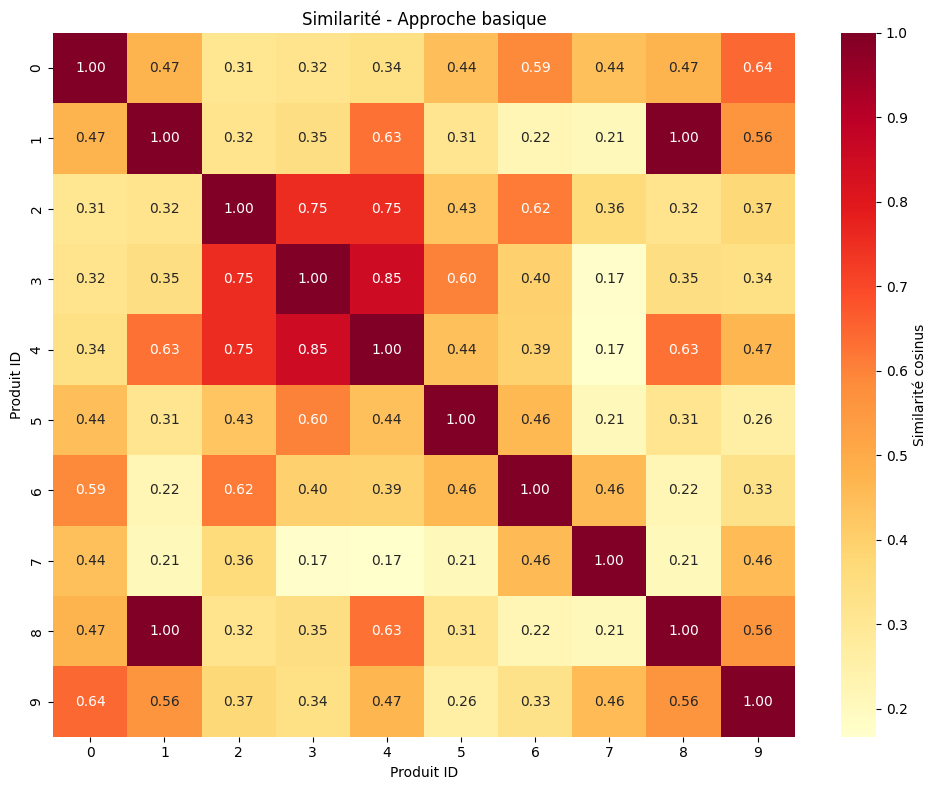


Statistiques de similarité (Similarité - Approche basique):
  Moyenne: 0.4336
  Médiane: 0.3953
  Min: 0.1669
  Max: 1.0000
  Écart-type: 0.1824


APPROCHE AMÉLIORÉE:


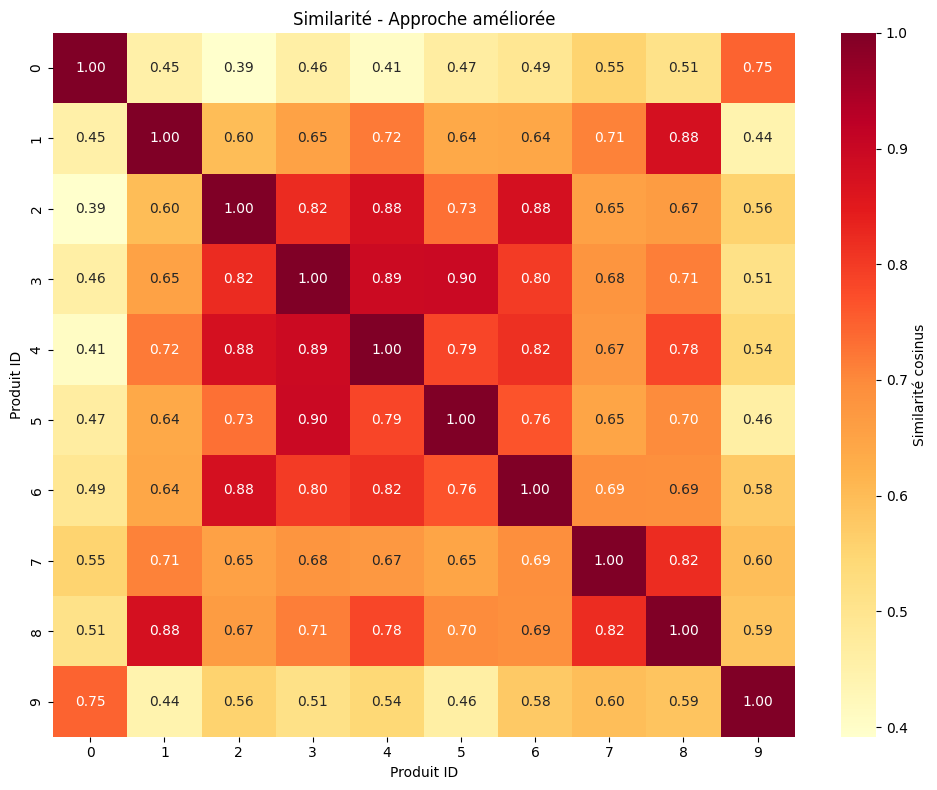


Statistiques de similarité (Similarité - Approche améliorée):
  Moyenne: 0.6573
  Médiane: 0.6663
  Min: 0.3916
  Max: 0.8964
  Écart-type: 0.1402


In [ ]:
# Analyse approfondie: matrice de similarité pour plusieurs produits
import matplotlib.pyplot as plt
import seaborn as sns

def plot_similarity_matrix(embeddings, n_products=10, title="Matrice de similarité"):
    """Visualise la matrice de similarité entre n produits"""
    # Calculer la matrice de similarité
    similarity_matrix = cosine_similarity(embeddings[:n_products])

    # Créer le heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix,
                annot=True,
                fmt='.2f',
                cmap='YlOrRd',
                xticklabels=range(n_products),
                yticklabels=range(n_products),
                cbar_kws={'label': 'Similarité cosinus'})
    plt.title(title)
    plt.xlabel('Produit ID')
    plt.ylabel('Produit ID')
    plt.tight_layout()
    plt.show()

    # Statistiques
    # Exclure la diagonale (similarité avec soi-même)
    mask = np.ones_like(similarity_matrix, dtype=bool)
    np.fill_diagonal(mask, False)
    similarities = similarity_matrix[mask]

    print(f"\nStatistiques de similarité ({title}):")
    print(f"  Moyenne: {similarities.mean():.4f}")
    print(f"  Médiane: {np.median(similarities):.4f}")
    print(f"  Min: {similarities.min():.4f}")
    print(f"  Max: {similarities.max():.4f}")
    print(f"  Écart-type: {similarities.std():.4f}")

    return similarity_matrix

# Comparaison visuelle
print("APPROCHE BASIQUE:")
embeddings_basic = np.array(df_clean_indexed['title_embedding'].head(10).tolist())
matrix_basic = plot_similarity_matrix(embeddings_basic, title="Similarité - Approche basique")

print("\n" + "="*70 + "\n")

print("APPROCHE AMÉLIORÉE:")
embeddings_improved = np.array(df_clean_indexed['title_embedding_improved'].head(10).tolist())
matrix_improved = plot_similarity_matrix(embeddings_improved, title="Similarité - Approche améliorée")

#### Recherche de produits similaires

Cette fonction utilitaire permet de trouver les produits les plus similaires à un produit donné :

**Fonctionnement :**
1. Prend l'embedding du produit de référence
2. Calcule la similarité cosinus avec tous les autres produits
3. Trie par ordre décroissant (les plus similaires en premier)
4. Retourne les top K produits

**Utilité pour le système de recommandation :**
- Recommandations basées sur le contenu (content-based filtering)
- Permet de suggérer des produits similaires lors de la consultation d'un produit
- Facilite l'exploration du catalogue

**Test :** Nous comparons les résultats avec :
- L'approche basique (anciens embeddings)
- L'approche améliorée (nouveaux embeddings)

In [ ]:
# Fonction utilitaire: trouver les produits similaires
def find_similar_products(product_idx, embedding_column='title_embedding_improved', top_k=5):
    """
    Trouve les produits les plus similaires à un produit donné

    Args:
        product_idx: index du produit de référence
        embedding_column: colonne contenant les embeddings à utiliser
        top_k: nombre de produits similaires à retourner
    """
    # Embedding du produit de référence
    ref_embedding = df_clean_indexed[embedding_column].iloc[product_idx]

    # Calculer la similarité avec tous les autres produits
    all_embeddings = np.array(df_clean_indexed[embedding_column].tolist())
    similarities = cosine_similarity([ref_embedding], all_embeddings)[0]

    # Trier par similarité (en excluant le produit lui-même)
    similar_indices = np.argsort(similarities)[::-1][1:top_k+1]

    # Afficher les résultats
    print(f"Produit de référence (index {product_idx}):")
    print(f"  Titre: {df_clean_indexed['title_en'].iloc[product_idx]}")
    if 'category1_code' in df_clean_indexed.columns:
        print(f"  Catégorie: {df_clean_indexed['category1_code'].iloc[product_idx]}")
    print(f"\nTop {top_k} produits similaires:")
    print("-" * 80)

    for rank, idx in enumerate(similar_indices, 1):
        print(f"\n{rank}. [Similarité: {similarities[idx]:.4f}]")
        print(f"   Titre: {df_clean_indexed['title_en'].iloc[idx]}")
        if 'category1_code' in df_clean_indexed.columns:
            print(f"   Catégorie: {df_clean_indexed['category1_code'].iloc[idx]}")

    return similar_indices, similarities[similar_indices]

# Test avec un produit exemple
print("="*80)
print("RECHERCHE DE PRODUITS SIMILAIRES - Approche améliorée")
print("="*80)
similar_idx, similar_scores = find_similar_products(0, 'title_embedding_improved', top_k=5)

print("\n" + "="*80)
print("COMPARAISON avec approche basique:")
print("="*80)
similar_idx_basic, similar_scores_basic = find_similar_products(0, 'title_embedding', top_k=5)

RECHERCHE DE PRODUITS SIMILAIRES - Approche améliorée
Produit de référence (index 0):
  Titre: Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux

Top 5 produits similaires:
--------------------------------------------------------------------------------

1. [Similarité: 0.8937]
   Titre: Tweed Pailletten & goldfarbenes Metall Schwarz & Weiß

2. [Similarité: 0.8487]
   Titre: Lammleder & goldfarbenes Metall Bordeaux

3. [Similarité: 0.8472]
   Titre: Kalbslackleder & goldfarbenes Metall Bordeaux

4. [Similarité: 0.8450]
   Titre: Satin & goldfarbenes Metall Schwarz

5. [Similarité: 0.8023]
   Titre: Kalbsleder & goldfarbenes Metall Schwarz

COMPARAISON avec approche basique:
Produit de référence (index 0):
  Titre: Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux

Top 5 produits similaires:
--------------------------------------------------------------------------------

1. [Similarité: 0.8697]
   Titre: Tweed Pailletten & goldfarbenes Metall Schwarz & Weiß

2. [Similarité: 0.8461]

#### 4. Visualisation

#### Visualisation t-SNE des embeddings - Approche basique

**t-SNE (t-Distributed Stochastic Neighbor Embedding)** est une technique de réduction de dimensionnalité qui permet de visualiser des données haute dimension (384 ou 768 dimensions) en 2D.

**Principe :**
- Conserve les relations de proximité locales
- Les produits similaires (proches dans l'espace haute dimension) restent proches en 2D
- Les couleurs représentent les catégories de produits (category2_code)

**Interprétation :**
- **Clusters distincts** : Bonne séparation des catégories
- **Points mélangés** : Catégories mal différenciées
- **Forme des clusters** : Cohérence intra-catégorie

Cette première visualisation montre les résultats avec l'**approche basique**.

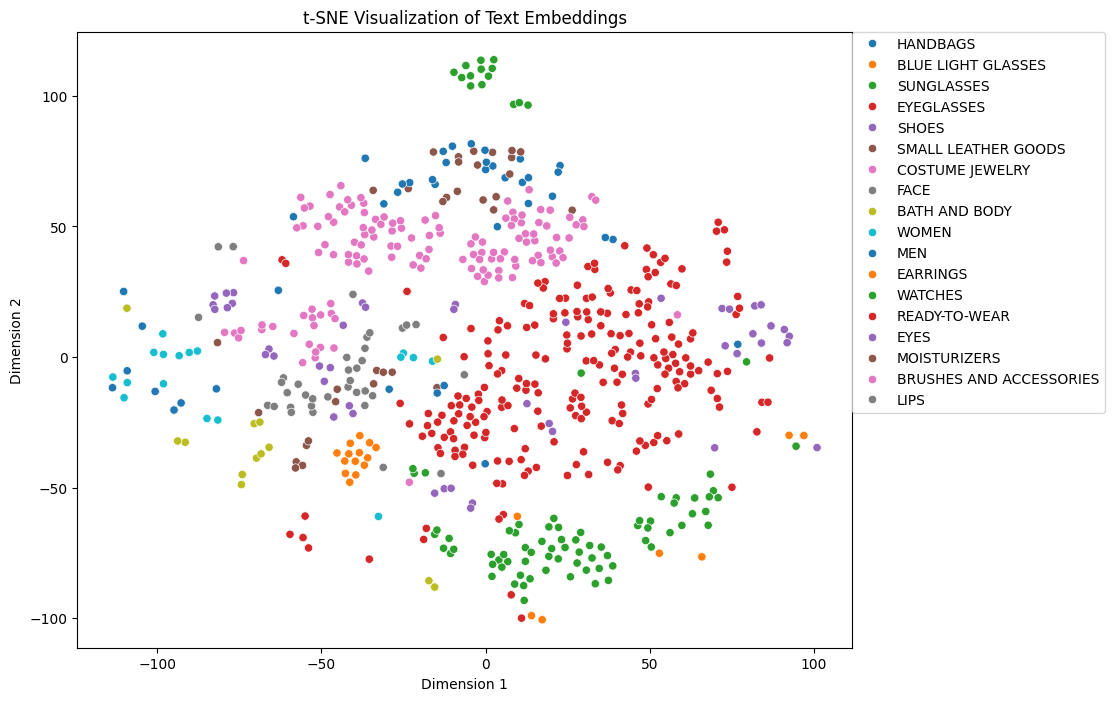

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
text_embeddings_2d = tsne.fit_transform(np.vstack(df_clean_indexed['title_embedding'].values))
plt.figure(figsize=(10, 8))
sns.scatterplot(x=text_embeddings_2d[:,0], y=text_embeddings_2d[:,1], hue=df_clean_indexed['category2_code'], palette='tab10', legend='full')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)

plt.title('t-SNE Visualization of Text Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

#### Visualisation t-SNE des embeddings - Approche améliorée

Cette seconde visualisation montre les résultats avec l'**approche améliorée** (`all-mpnet-base-v2` + texte enrichi).

**Comparaison attendue avec l'approche basique :**
- **Clusters mieux définis** : Les catégories se séparent plus clairement
- **Moins de chevauchement** : Meilleure distinction entre types de produits
- **Cohérence accrue** : Produits d'une même catégorie plus rapprochés

**Objectif :** Démontrer visuellement que les embeddings améliorés capturent mieux la structure sémantique du catalogue de produits.

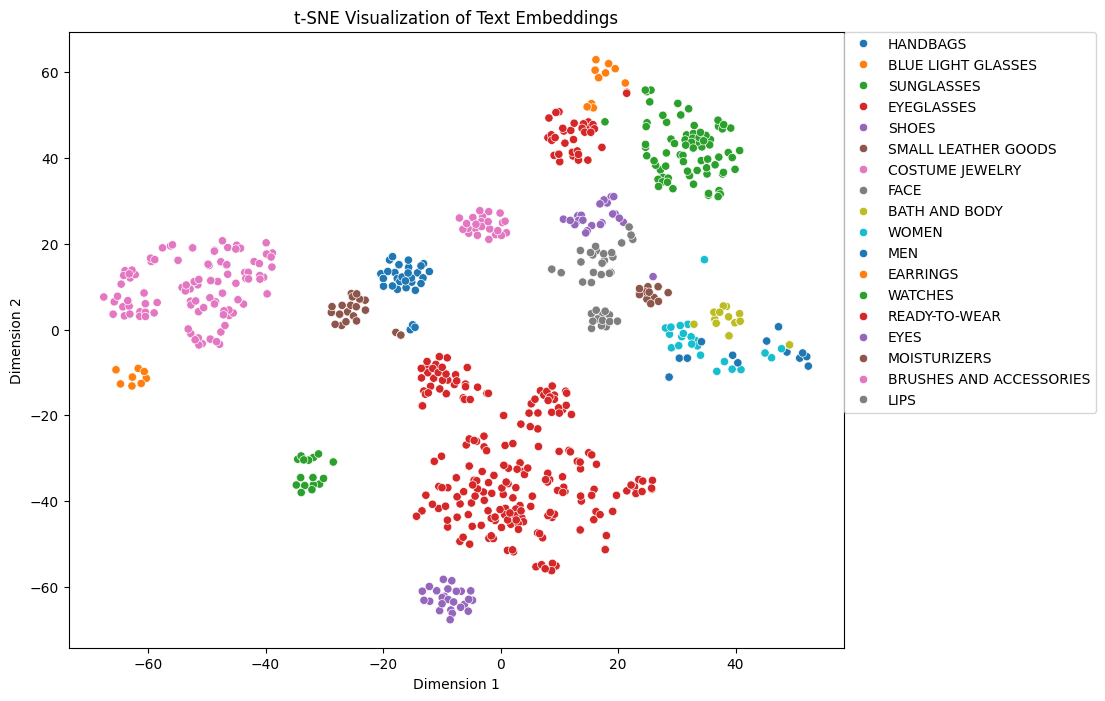

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
text_embeddings_2d = tsne.fit_transform(np.vstack(df_clean_indexed['title_embedding_improved'].values))
plt.figure(figsize=(10, 8))
sns.scatterplot(x=text_embeddings_2d[:,0], y=text_embeddings_2d[:,1], hue=df_clean_indexed['category2_code'], palette='tab10', legend='full')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)

plt.title('t-SNE Visualization of Text Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## Partie 4 : Création d'une plateforme de système de recommandation

### 1. Développement de l'interface

### 2. Fonctionnalités principales

### 3. Approche technique

### 4. Validation

## Conclusion